<a href="https://colab.research.google.com/github/AmitG-98/MSc-Data-Science-Final-Project/blob/main/Global_macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Global Macroeconomic Indicator Dashboard with Predictive Analytics**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.express as px
from dash import Dash, html, dcc, Input, Output
from tabulate import tabulate
from sklearn.linear_model import LinearRegression

In [ ]:
""" To see weather te data set is working we will try to read data set"""
df = pd.read_csv('/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/GDP Growth.csv')
df.head()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69


In [41]:
""" Here we have written a funtion incoomon for all data sets to clean them """
def clean_csv(file_path, cleaned_file_path):
    """
    Cleans a CSV file by removing metadata, ensuring consistent column counts,
    and handling encoding issues like BOM.

    Args:
        file_path (str): Path to the input CSV file.
        cleaned_file_path (str): Path to save the cleaned CSV file.
    """
    # Step 1: Open and read the raw content of the file
    with open(file_path, 'r', encoding='utf-8') as file:
        raw_content = file.readlines()

    # Step 2: Remove empty lines and whitespace
    cleaned_content = [line.strip() for line in raw_content if line.strip()]

    # Step 3: Identify the header row (adjust "Header Keyword" as needed)
    header_index = next((i for i, line in enumerate(cleaned_content) if "Country Name" in line), 0)

    # Extract the actual data starting from the header row
    cleaned_content = cleaned_content[header_index:]

    # Step 4: Save the cleaned content back to a CSV file
    with open(cleaned_file_path, 'w', encoding='utf-8') as file:
        file.write("\n".join(cleaned_content))

    # Step 5: Load the cleaned CSV to ensure consistency
    try:
        data = pd.read_csv(cleaned_file_path)
        print("Dataset preview:")
        print(data.head())  # Preview cleaned data
        print("\nDataset info:")
        print(data.info())  # Check structure and missing values

        # Optionally save the cleaned dataset again
        data.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned CSV saved to: {cleaned_file_path}")
    except Exception as e:
        print(f"Error reading cleaned file: {e}")

In [42]:
"""Gdp Growth"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/GDP Growth.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/GDP Growth(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""unemployment"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Unemployment.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Unemployment(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Real interest rate"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Real Interest rate.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Real Interest rate(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Inflation"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Inflation ,Consumer.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Inflation(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)


"""Houseold"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Houseolld final consmption.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Houseolld(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Stock Data"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/stock data.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/stock(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""CPIA"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/CPIA.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/CPIA(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

Dataset preview:
                  Country Name Country Code         Indicator Name  \
0                        Aruba          ABW  GDP growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                  Afghanistan          AFG  GDP growth (annual %)   
3   Africa Western and Central          AFW  GDP growth (annual %)   
4                       Angola          AGO  GDP growth (annual %)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
1  NY.GDP.MKTP.KD.ZG   NaN  0.460106  7.868013  5.616400  4.668135  5.138990   
2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
3  NY.GDP.MKTP.KD.ZG   NaN  1.873455  3.707643  7.145784  5.406403  4.102491   
4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   

   ...      2015      2016      2017      2018      2019       2020  \
0  ... -0.

In [45]:
# Load your dataset (update the file path accordingly)
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Combined_Dataset.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Filling missing values using multiple approaches
def fill_missing_values(df):
    """
    Fill missing values using forward-fill and backward-fill methods.

    Args:
        df (pd.DataFrame): Input DataFrame with missing values.

    Returns:
        pd.DataFrame: DataFrame with filled missing values.
    """
    df_filled = df.copy()
    df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')
    return df_filled

filled_data = fill_missing_values(combined_data)

# Save the cleaned dataset to a new location
output_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(D).csv'  # Replace with your desired output path
df_cleaned.to_csv(output_path, index=False)

print(f"Missing values filled and dataset saved to: {output_path}")

Missing values filled and dataset saved to: /content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(D).csv


<ipython-input-45-dd4b827a41f5>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')


In [47]:
# Define developed and developing countries
developed_countries = ["United States", "Germany", "Japan", "United Kingdom", "Canada","Australia","France","Italy"]
developing_countries = ["India", "Brazil", "China", "South Africa", "Indonesia", "Mexico"]
least_developed_countries =["Afghanistan","Madagascar","Nepal","Ethiopia"]
# Split dataset
df_developed = df_cleaned[df_cleaned["Country Name"].isin(developed_countries)]
df_developing = df_cleaned[df_cleaned["Country Name"].isin(developing_countries)]
df_least_developed = df_cleaned[df_cleaned["Country Name"].isin(least_developed_countries)]

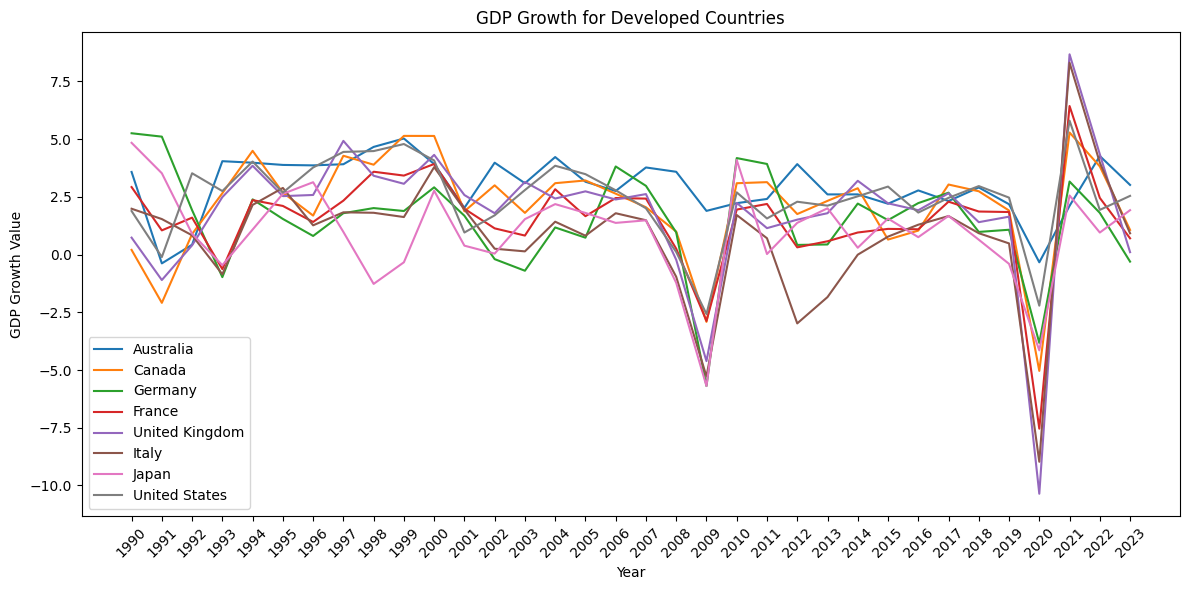

In [48]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'GDP Growth']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth Value')
plt.title('GDP Growth for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

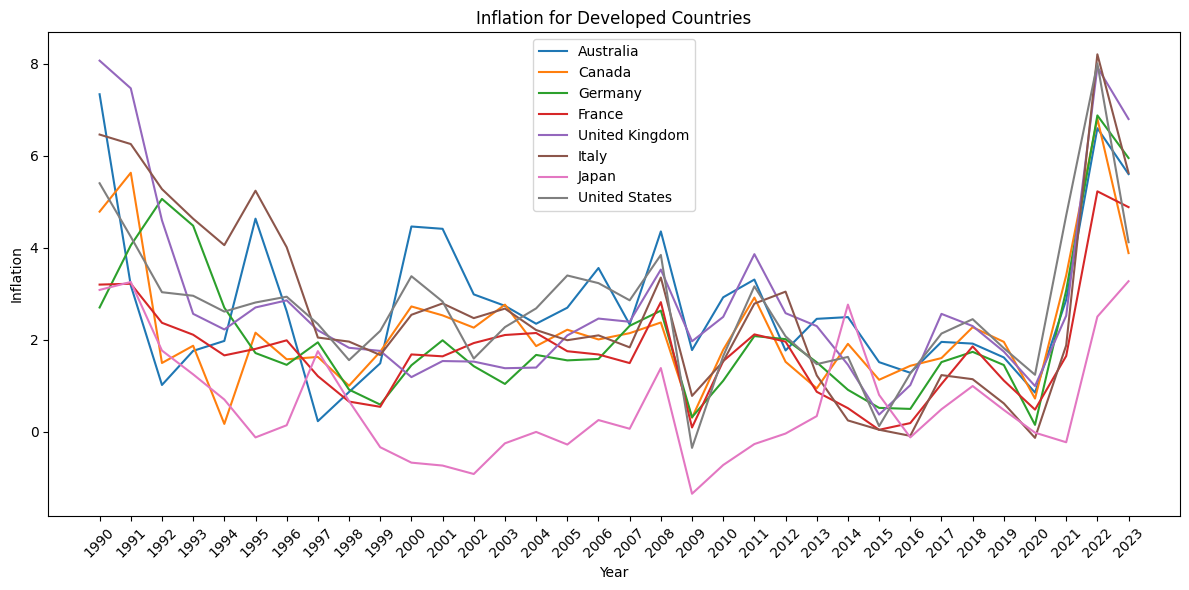

In [49]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Inflation']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Inflation')
plt.title('Inflation for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

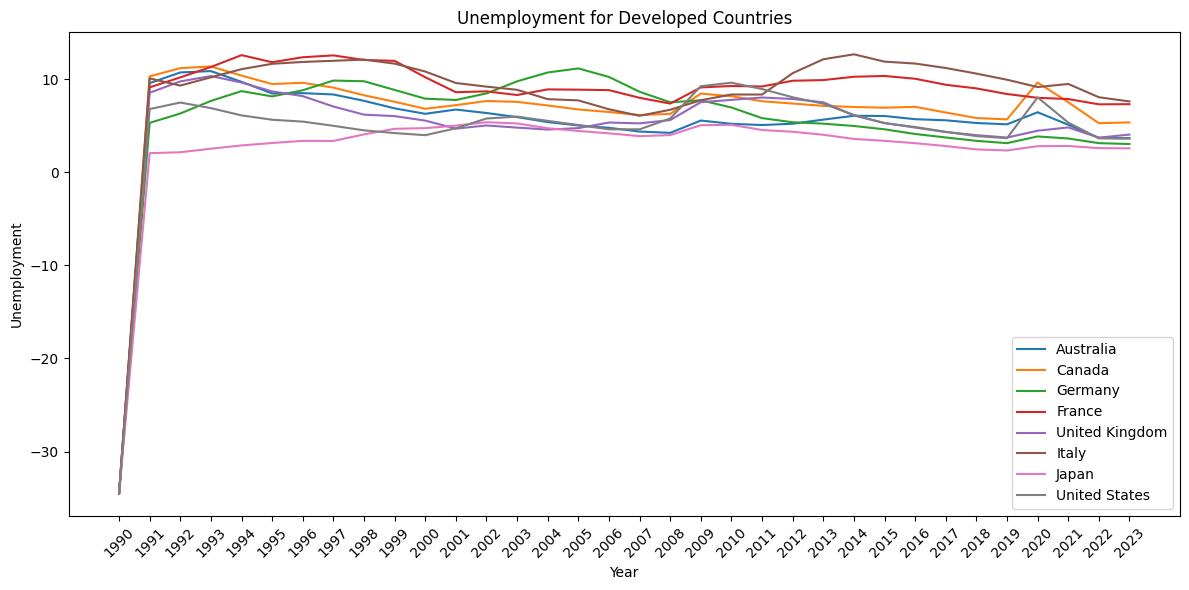

In [50]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Unemployment']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.title('Unemployment for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

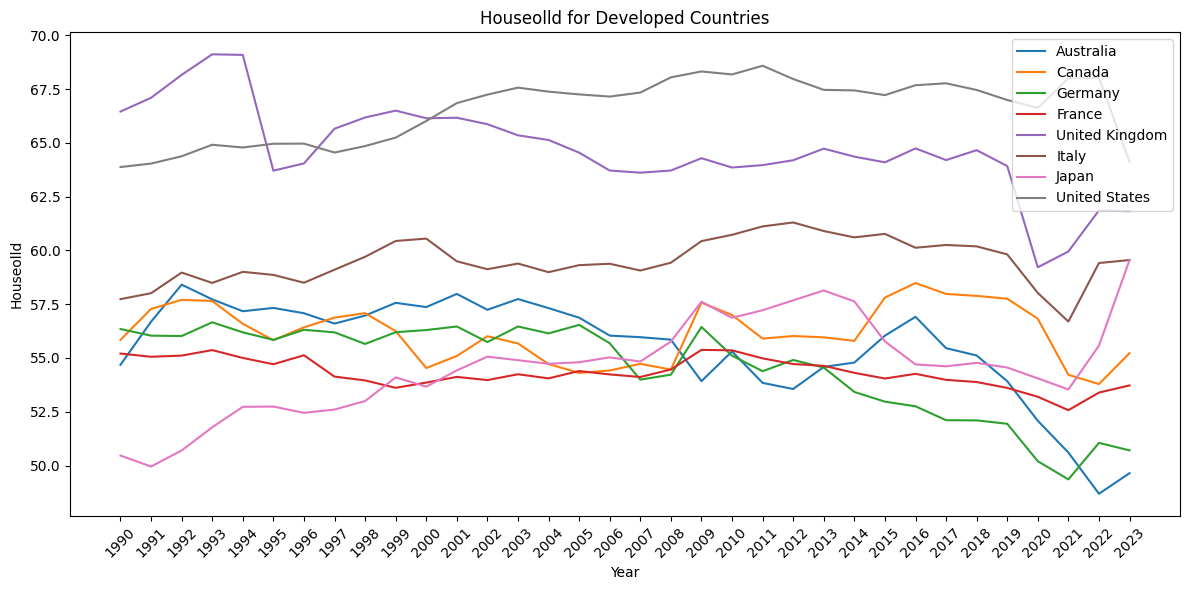

In [51]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Houseolld']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Houseolld')
plt.title('Houseolld for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

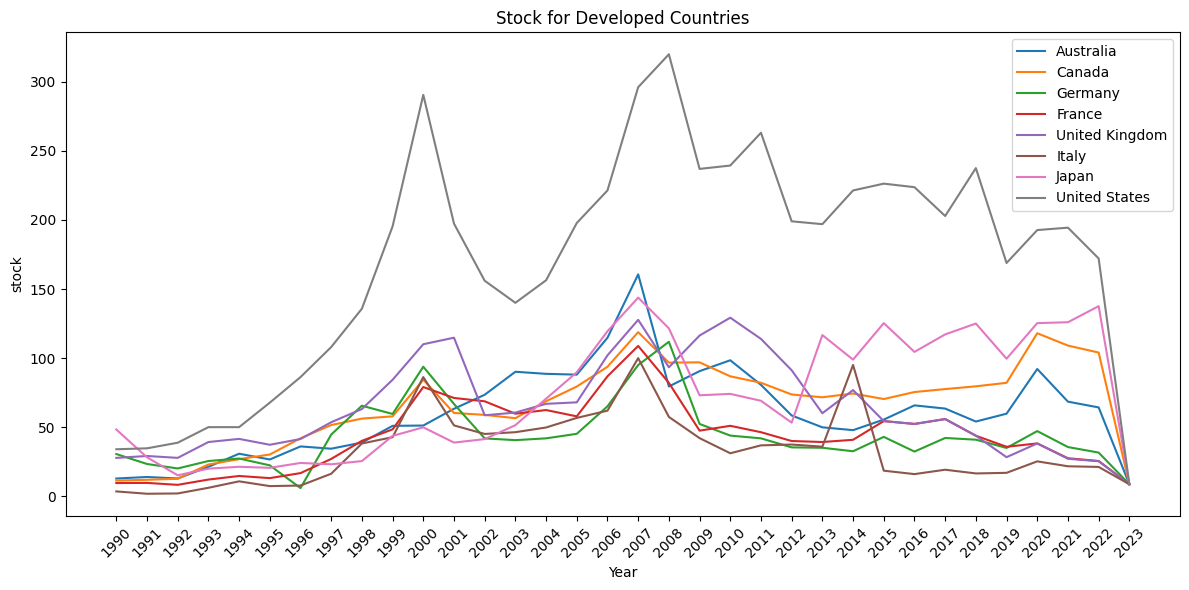

In [52]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'stock']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('stock')
plt.title('Stock for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

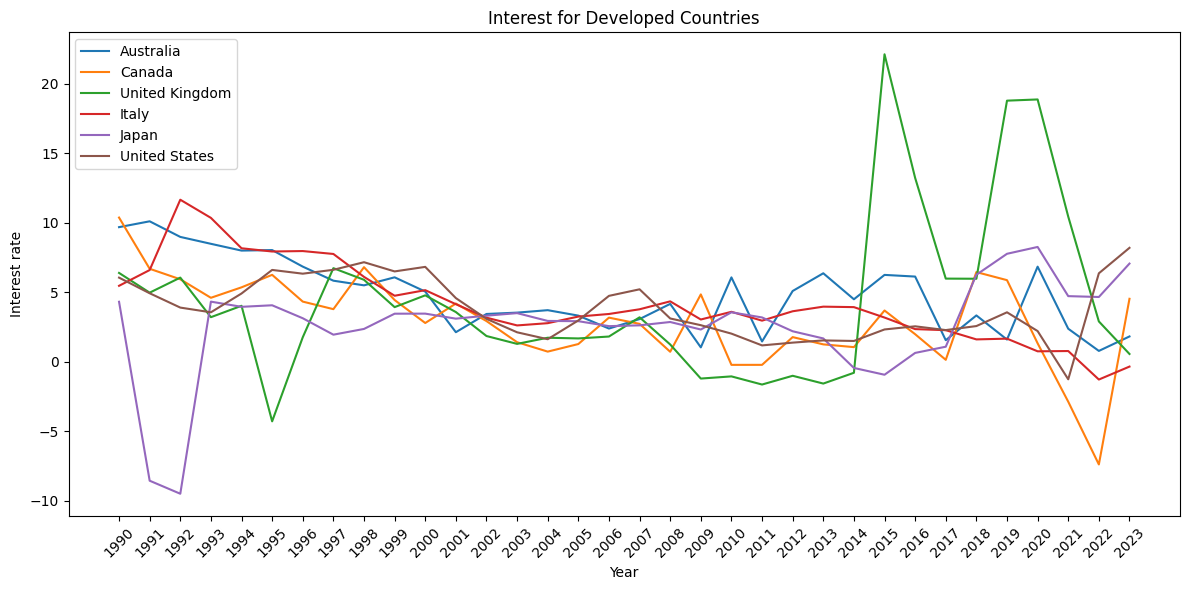

In [53]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Real Interest rate']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Interest rate')
plt.title('Interest for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

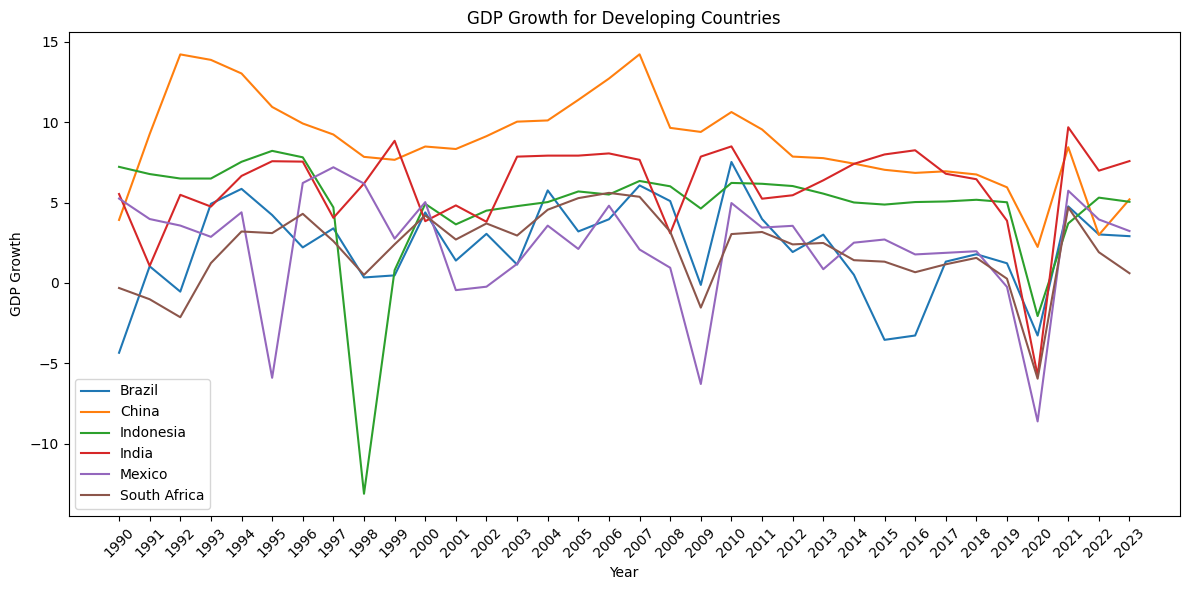

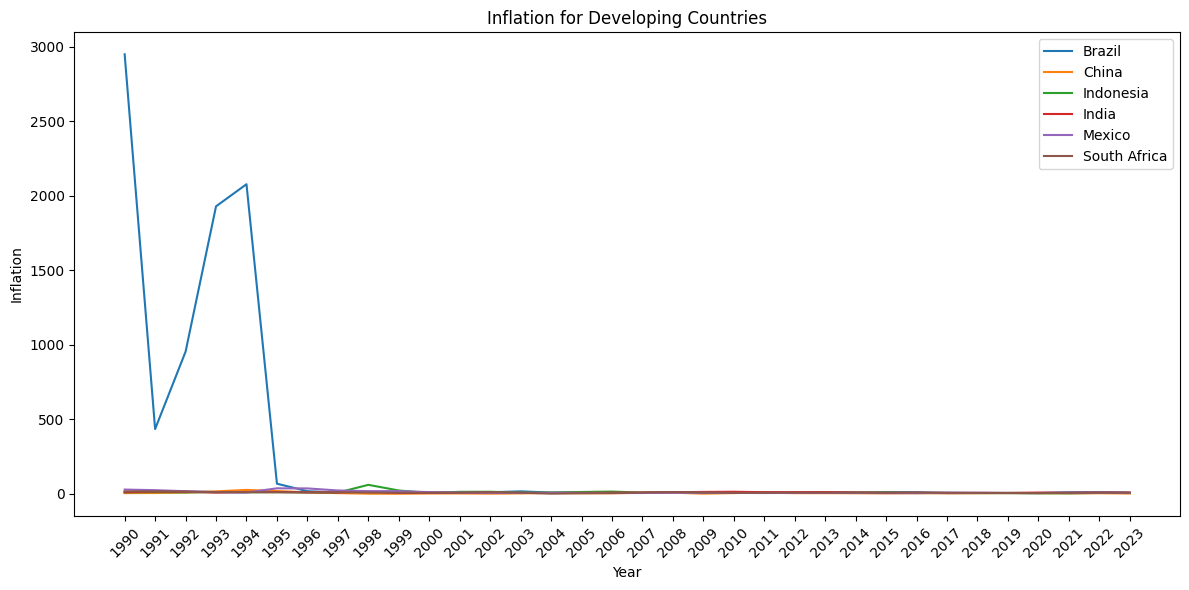

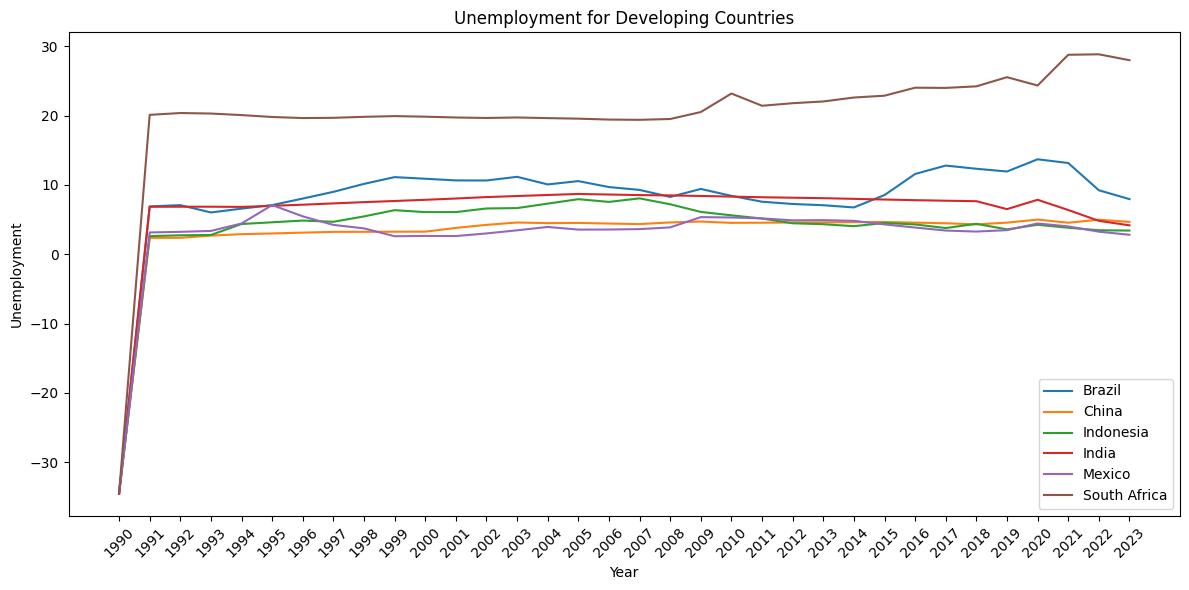

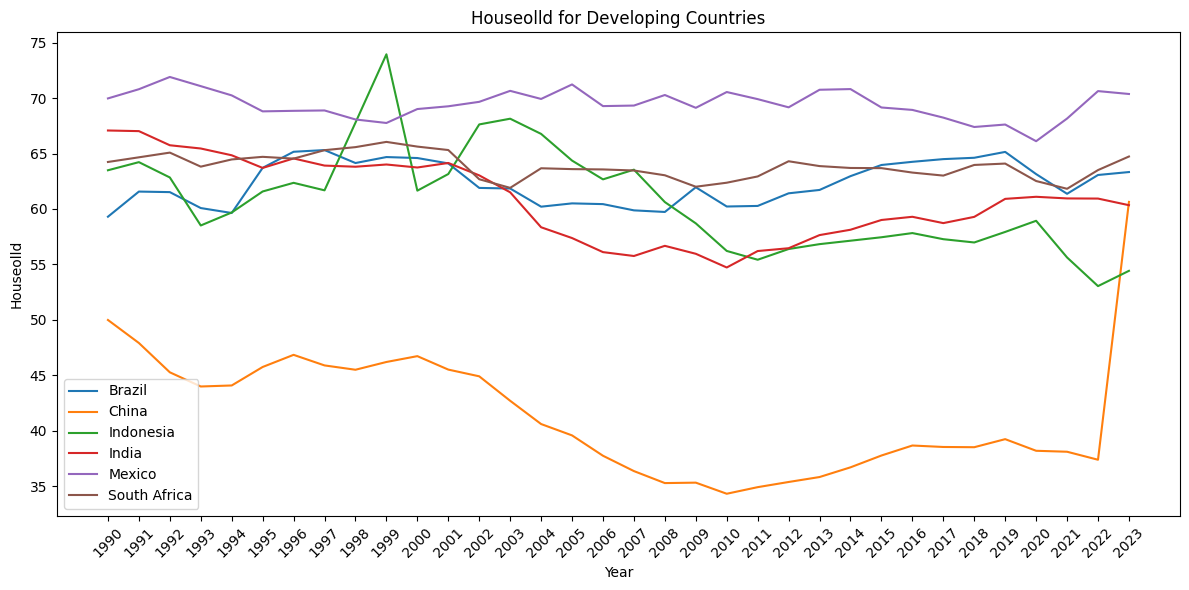

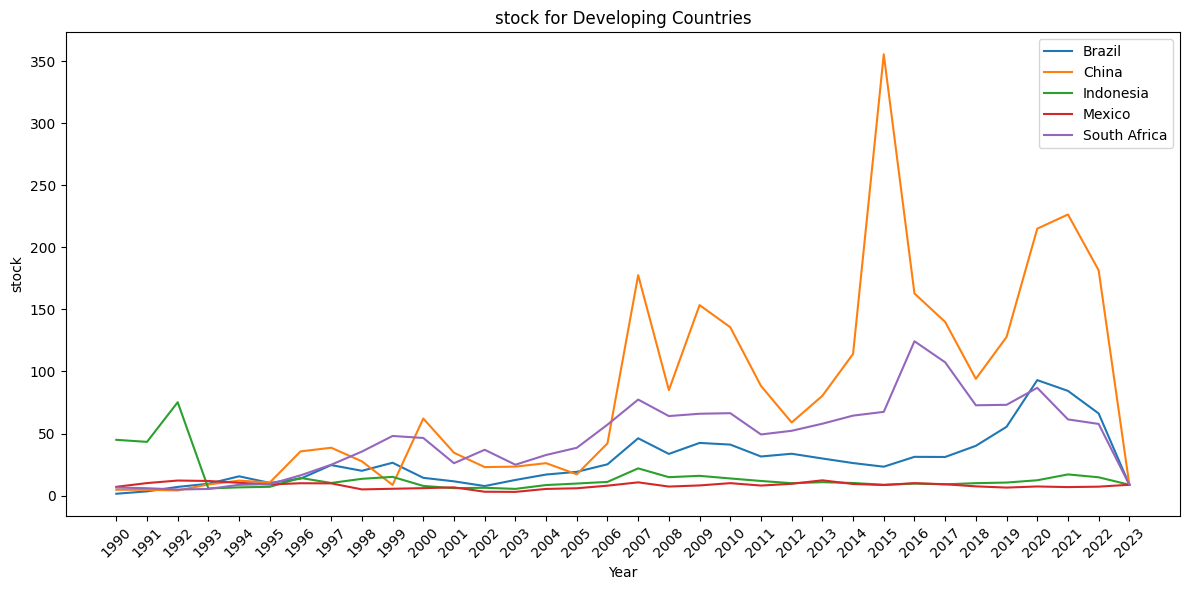

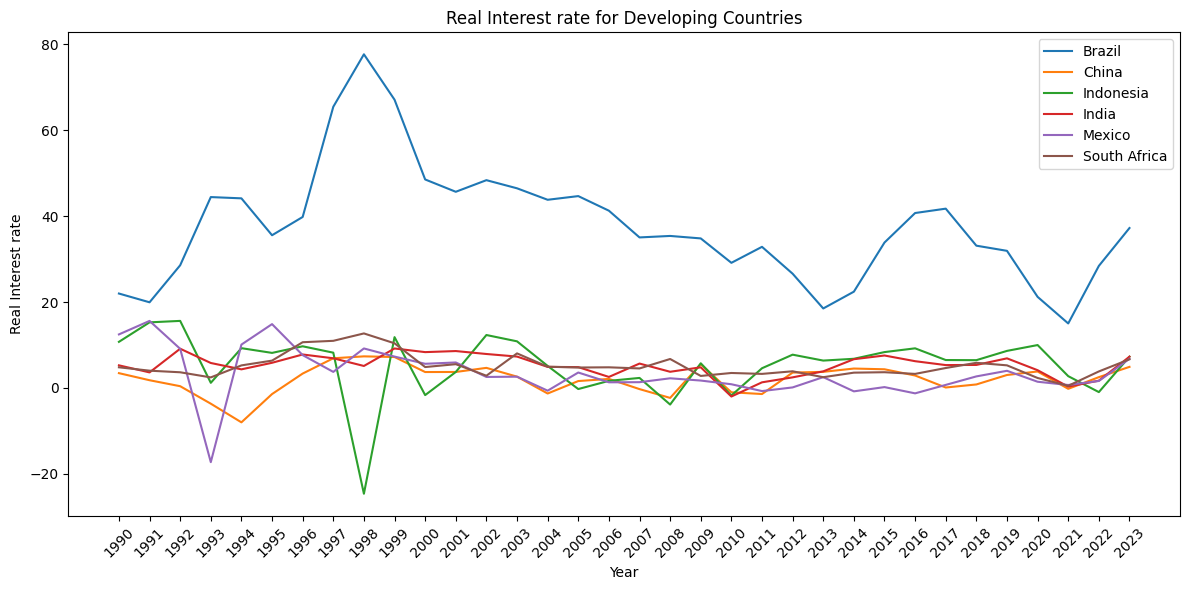

In [54]:

# Reshape the data for plotting
df_developing_melted = df_developing.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

indicators = ['GDP Growth', 'Inflation', 'Unemployment', 'Houseolld', 'stock', 'Real Interest rate']

for indicator in indicators:
    # Filter for the current indicator
    indicator_data = df_developing_melted[df_developing_melted['Indicator'] == indicator]

    # Create the plot
    plt.figure(figsize=(12, 6))
    for country in indicator_data['Country Name'].unique():
        country_data = indicator_data[indicator_data['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Value'], label=country)

    plt.xlabel('Year')
    plt.ylabel(indicator)  # Use the current indicator as the y-axis label
    plt.title(f'{indicator} for Developing Countries')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

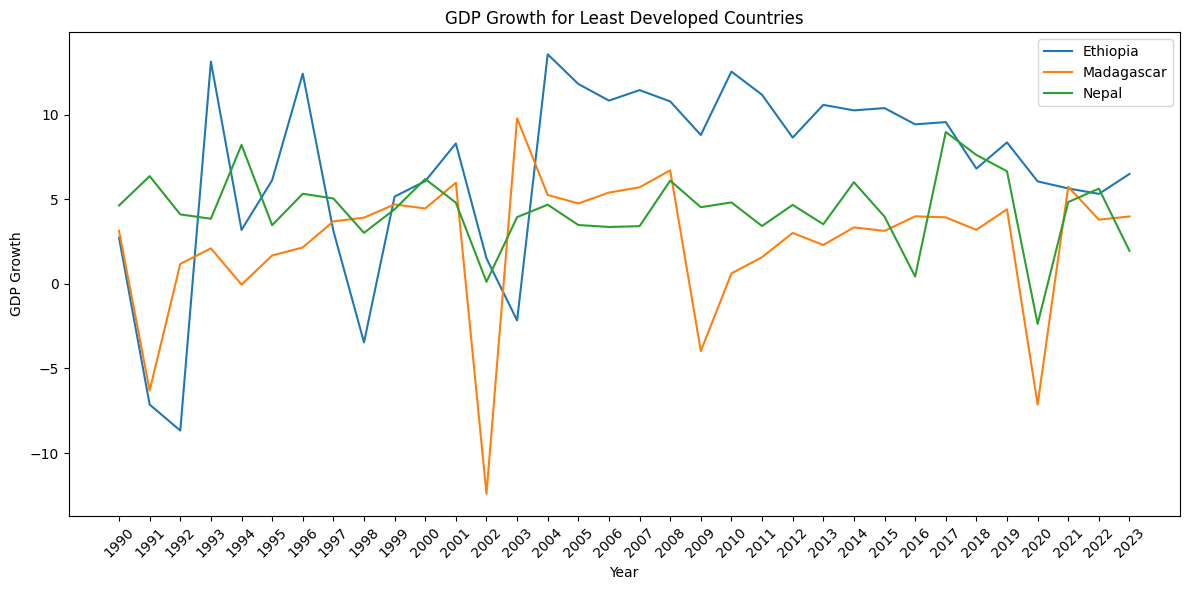

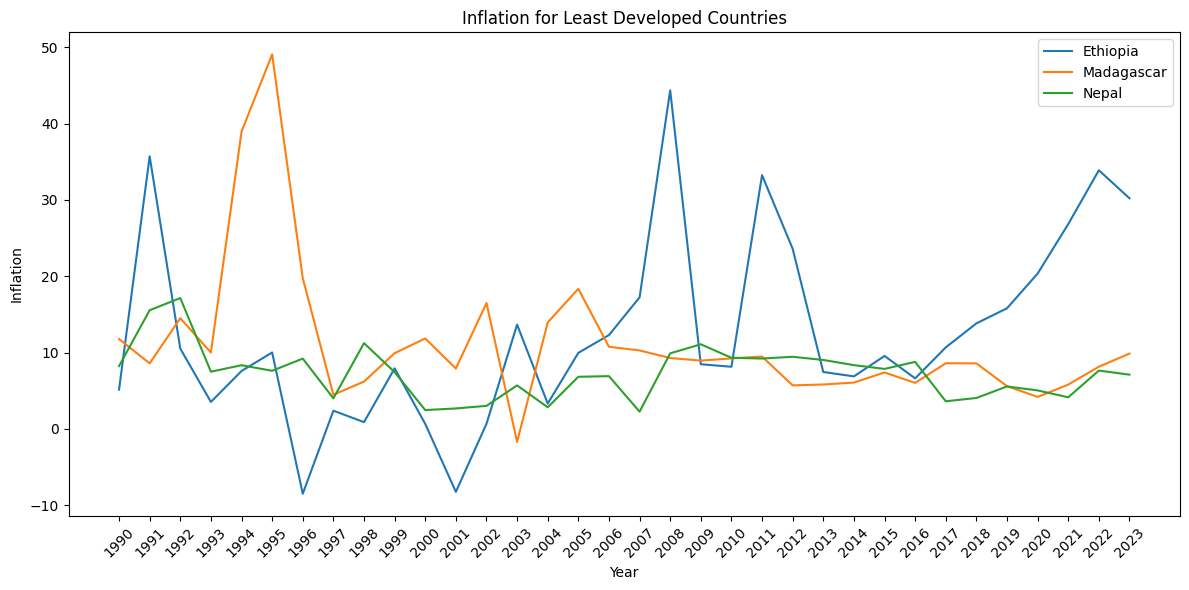

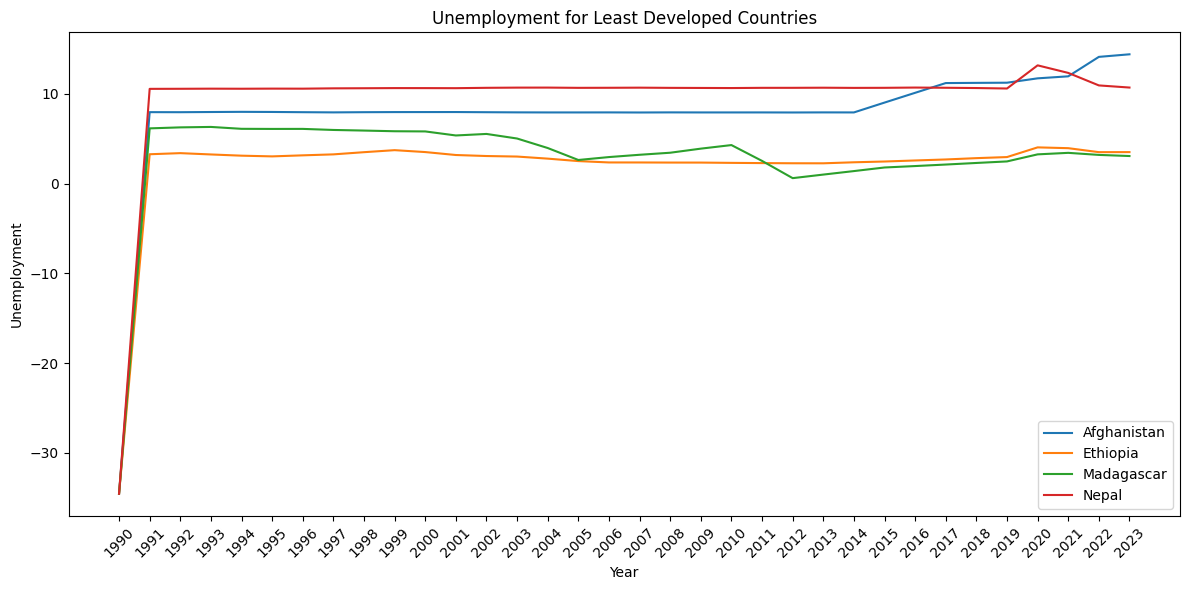

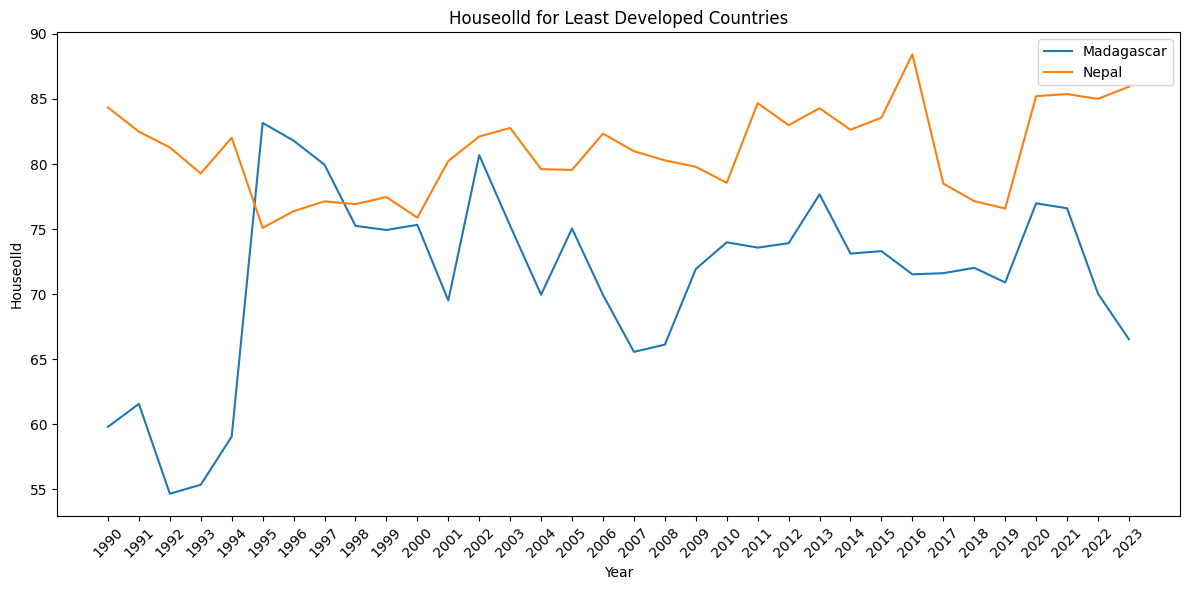

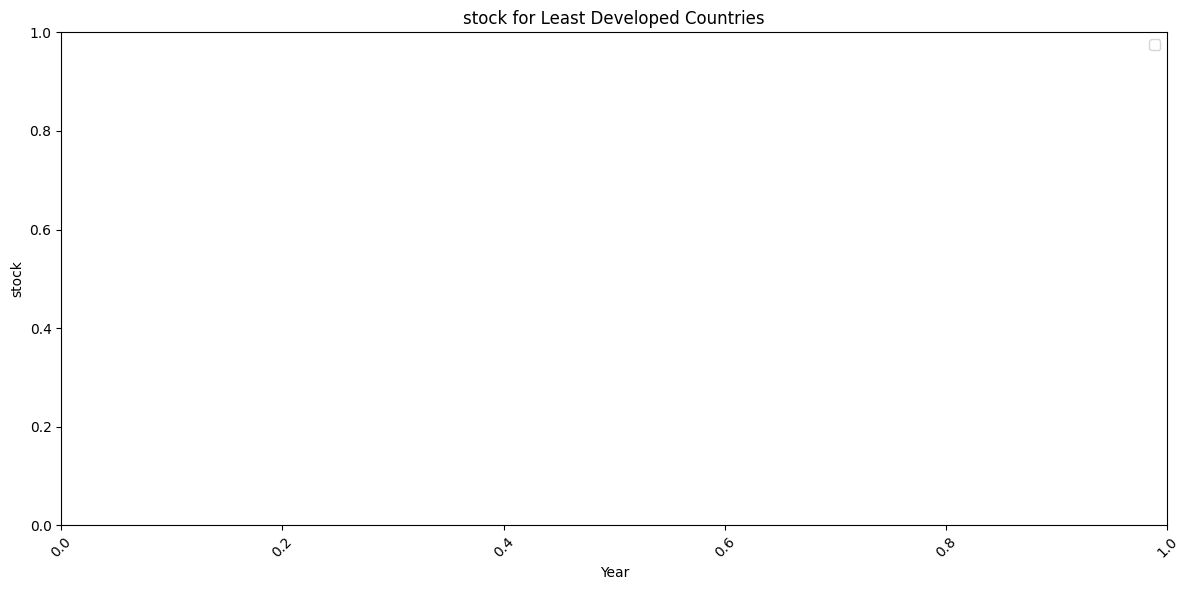

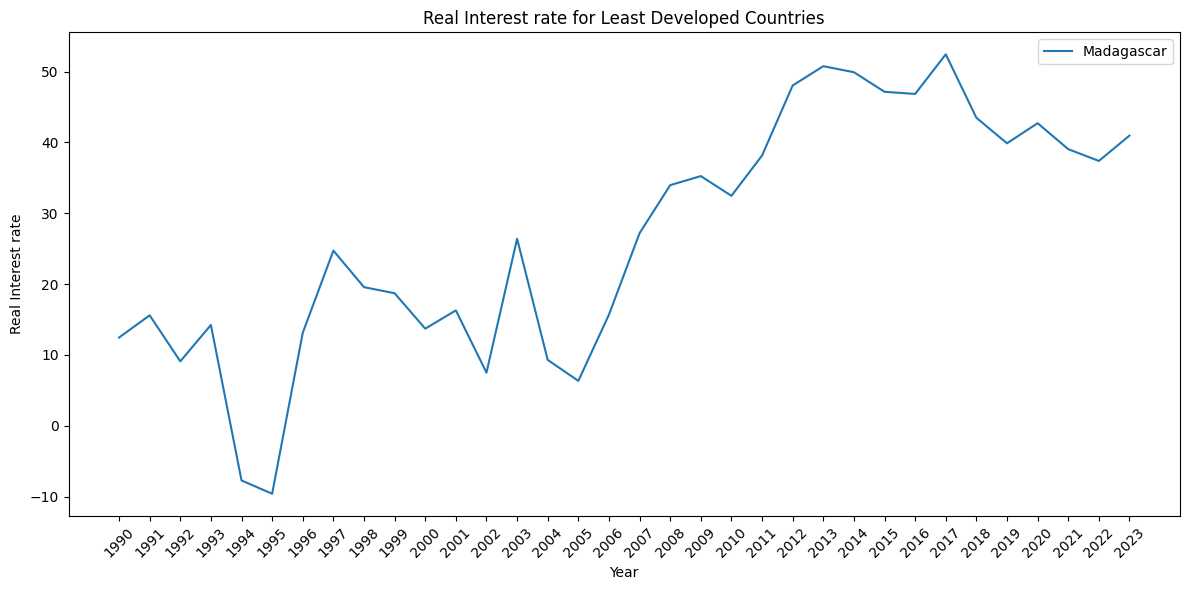

In [55]:

# For Least developed countries

# Reshape the data for plotting
df_least_developed_melted = df_least_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

indicators = ['GDP Growth', 'Inflation', 'Unemployment', 'Houseolld', 'stock', 'Real Interest rate']

for indicator in indicators:
    # Filter for the current indicator
    indicator_data = df_least_developed_melted[df_least_developed_melted['Indicator'] == indicator]

    # Create the plot
    plt.figure(figsize=(12, 6))
    for country in indicator_data['Country Name'].unique():
        country_data = indicator_data[indicator_data['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Value'], label=country)

    plt.xlabel('Year')
    plt.ylabel(indicator)  # Use the current indicator as the y-axis label
    plt.title(f'{indicator} for Least Developed Countries')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains 'Country' and 'Indicator' columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Define the indicators of interest
indicators_of_interest = ['GDP Growth', 'Inflation', 'Unemployment', 'Real Interest Rate','houseolld']

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]

# Group by 'Indicator' and collect unique countries for each indicator
indicator_countries = filtered_df.groupby('Indicator')['Country Name'].apply(set)

# Find the intersection of countries across the selected indicators
common_countries = set.intersection(*indicator_countries)

# Convert to a sorted list for better readability
common_countries = sorted(common_countries)

# Save the list of common countries to a CSV file
output_path = '/content/drive/MyDrive/Msc Data Science Final Project/common_countries_selected_indicators.csv'
pd.DataFrame({'Country': common_countries}).to_csv(output_path, index=False)

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]
# Economic classification of countries (sample data; update with actual classifications)
economic_classification = {
    'Developed': ['United States', 'Germany', 'United Kingdom', 'Canada', 'Japan', 'Australia', 'France'],
    'Developing': ['India', 'China', 'Brazil', 'South Africa', 'Indonesia', 'Mexico', 'Turkey','Bangladesh'],
    'Underdeveloped': ['Afghanistan', 'Haiti', 'Somalia', 'Chad','Madagascar', 'Nigeria', 'South Sudan', 'Yemen','Colombia','Peru','Slovenia','Panama','Kenya','Ghana','Malta']
}

# Categorize the shortlisted countries
categorized_countries = {
    'Developed': [],
    'Developing': [],
    'Underdeveloped': []
}

for country in common_countries:
    for category, country_list in economic_classification.items():
        if country in country_list:
            categorized_countries[category].append(country)
            break

# Print the categorized countries in table format
print("\nCategorized Countries:\n")
for category, countries in categorized_countries.items():
    print(f"\n{category} Economies:\n")
    print(tabulate([[country] for country in sorted(countries)], headers=["Country"], tablefmt="grid"))


Categorized Countries:


Developed Economies:

+----------------+
| Country        |
+================+
| Australia      |
+----------------+
| Canada         |
+----------------+
| France         |
+----------------+
| Germany        |
+----------------+
| Japan          |
+----------------+
| United Kingdom |
+----------------+
| United States  |
+----------------+

Developing Economies:

+--------------+
| Country      |
+==============+
| Bangladesh   |
+--------------+
| Brazil       |
+--------------+
| China        |
+--------------+
| India        |
+--------------+
| Indonesia    |
+--------------+
| Mexico       |
+--------------+
| South Africa |
+--------------+

Underdeveloped Economies:

+------------+
| Country    |
+============+
| Chad       |
+------------+
| Colombia   |
+------------+
| Ghana      |
+------------+
| Haiti      |
+------------+
| Kenya      |
+------------+
| Madagascar |
+------------+
| Malta      |
+------------+
| Nigeria    |
+------------+
| P

In [ ]:
# prompt: According to countries available now again set the variable developed ,developing and least developed  by using the available countries

# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains 'Country' and 'Indicator' columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Define the indicators of interest (you might need to adjust these)
indicators_of_interest = ['GDP Growth', 'Inflation', 'Unemployment', 'Real Interest rate','Houseolld']

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]

# Group by 'Indicator' and collect unique countries for each indicator
indicator_countries = filtered_df.groupby('Indicator')['Country Name'].apply(set)

# Find the intersection of countries across the selected indicators
common_countries = set.intersection(*indicator_countries)

# Convert to a sorted list for better readability
common_countries = sorted(common_countries)

# Now, update the country lists based on the available countries in common_countries

developed_countries = [country for country in ["United States", "Germany", "Japan", "United Kingdom", "Canada","Australia","France","Italy","Sweden", "Netherlands"] if country in common_countries]
developing_countries = [country for country in ["India", "Brazil", "China", "South Africa", "Indonesia", "Mexico", "Turkey", "Philippines", "Thailand", "Vietnam",
                        "Egypt", "Pakistan", "Bangladesh", "Nigeria", "Argentina"] if country in common_countries]
least_developed_countries = [country for country in ["Afghanistan","Madagascar","Nepal","Yemen","Ethiopia","Colombia","Peru","Panama","Kenya"] if country in common_countries]

# Print or use the updated lists
print("Developed Countries:", developed_countries)
print("Developing Countries:", developing_countries)
print("Least Developed Countries:", least_developed_countries)

Developed Countries: ['United States', 'Japan', 'United Kingdom', 'Canada', 'Australia', 'Italy']
Developing Countries: ['India', 'Brazil', 'China', 'South Africa', 'Indonesia', 'Mexico', 'Philippines', 'Thailand', 'Bangladesh']
Least Developed Countries: ['Madagascar', 'Colombia', 'Peru', 'Panama', 'Kenya']


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00


Lstm

Arima

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calli

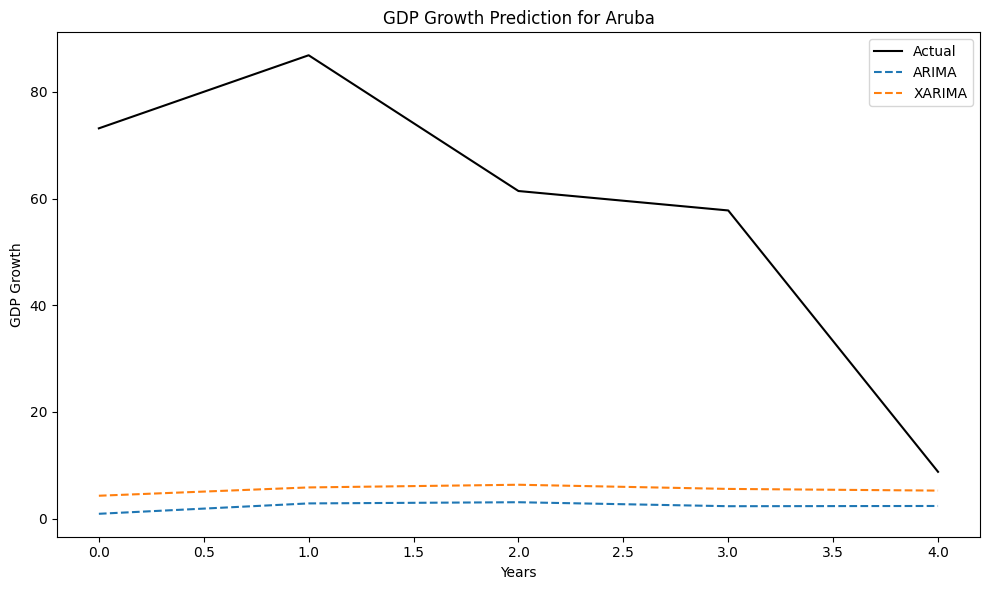

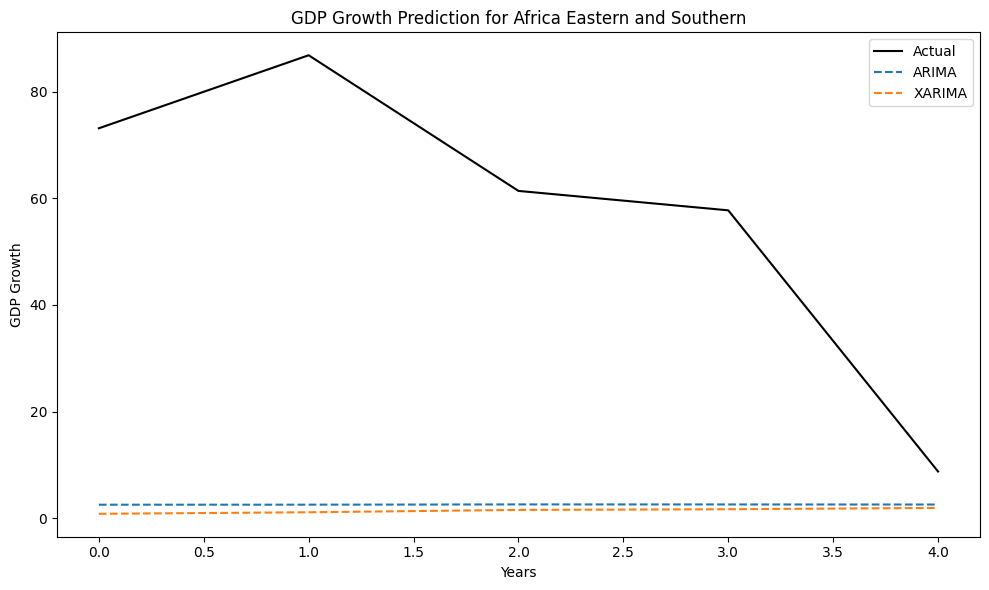

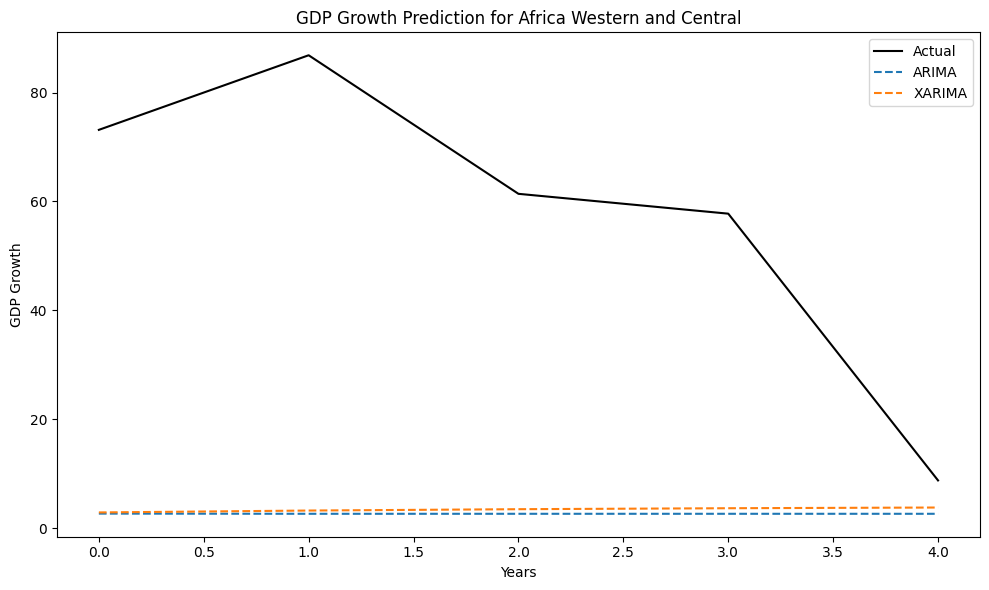

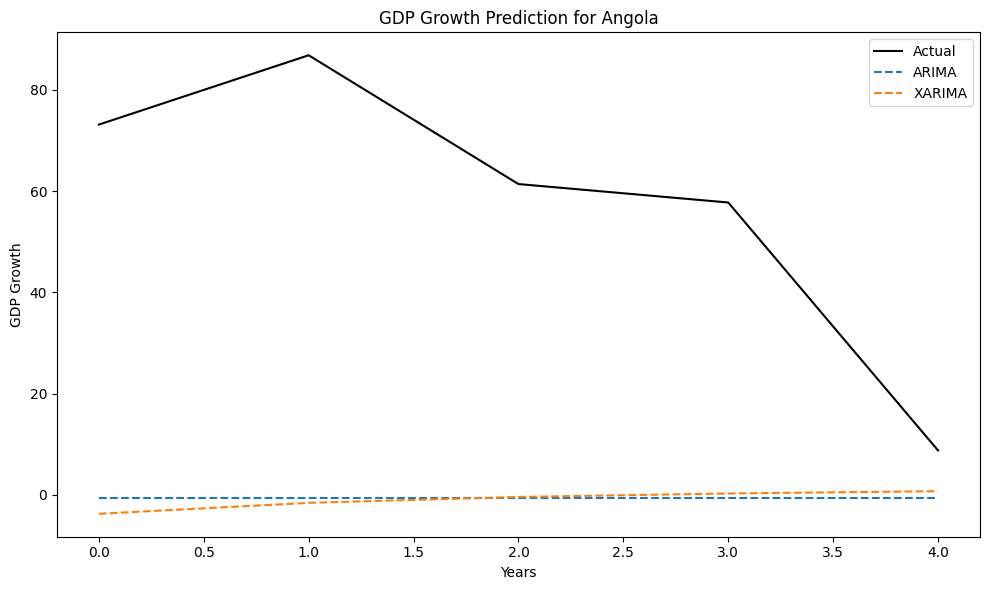

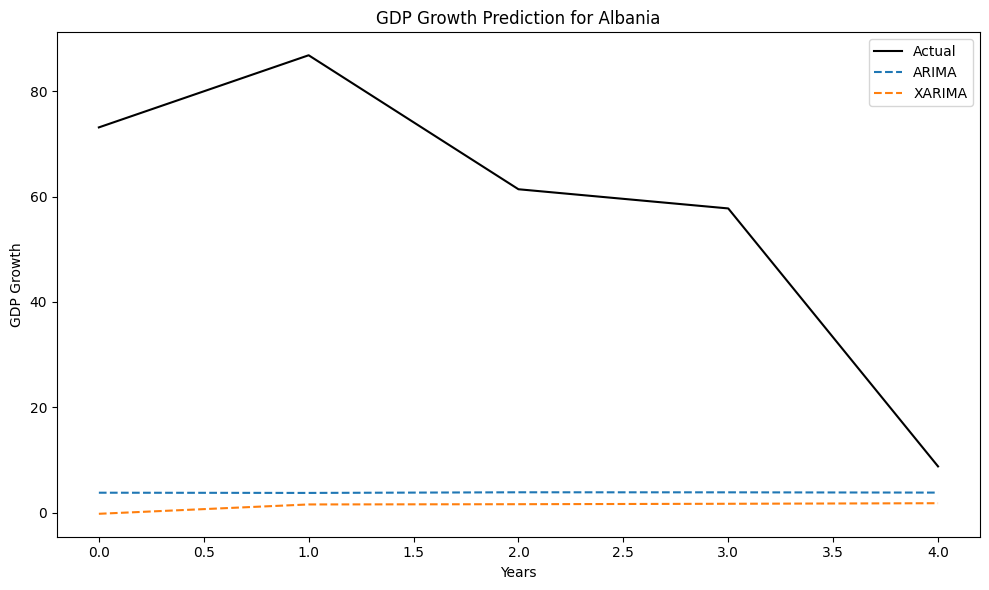

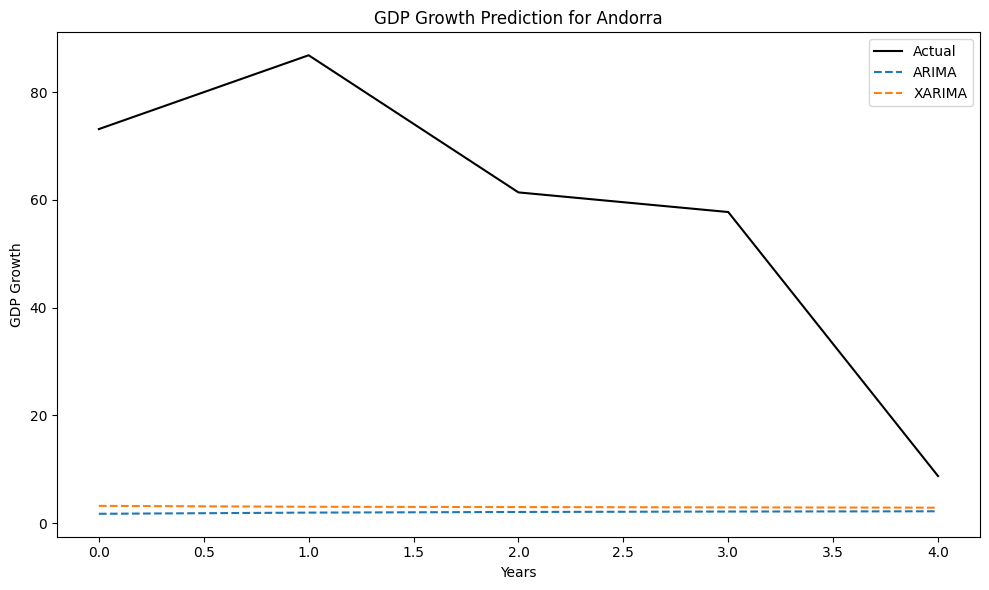

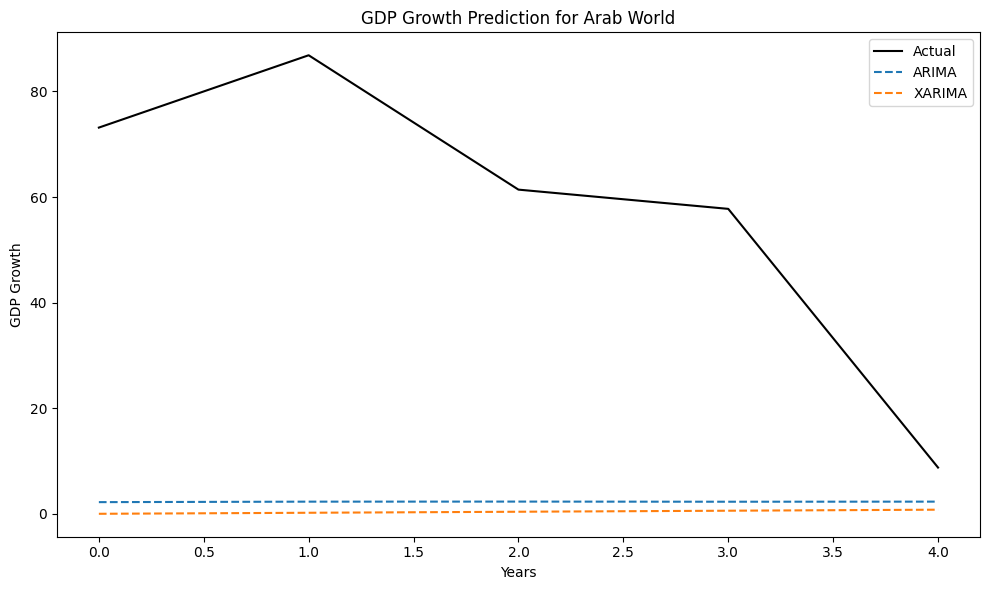

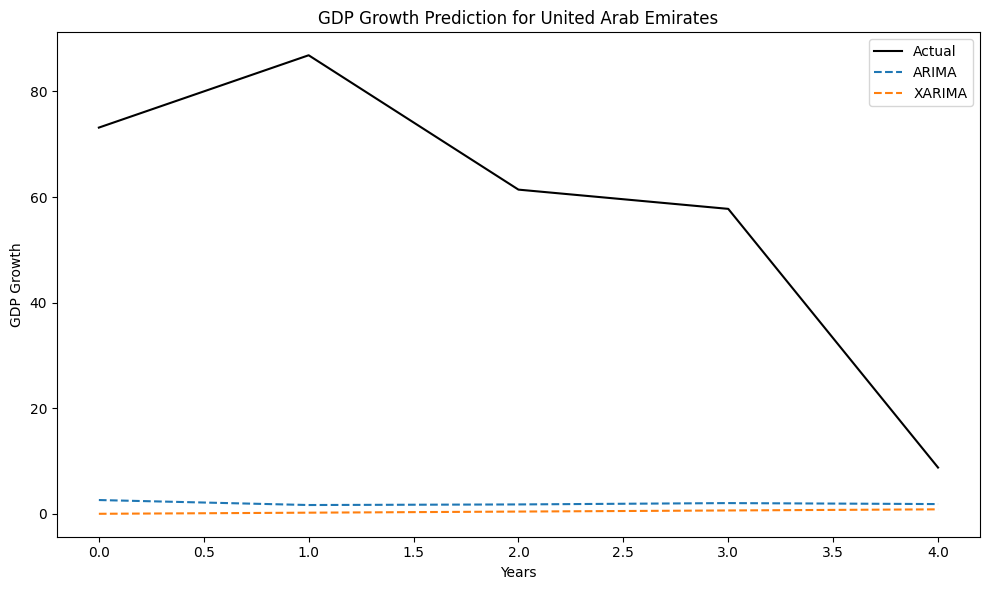

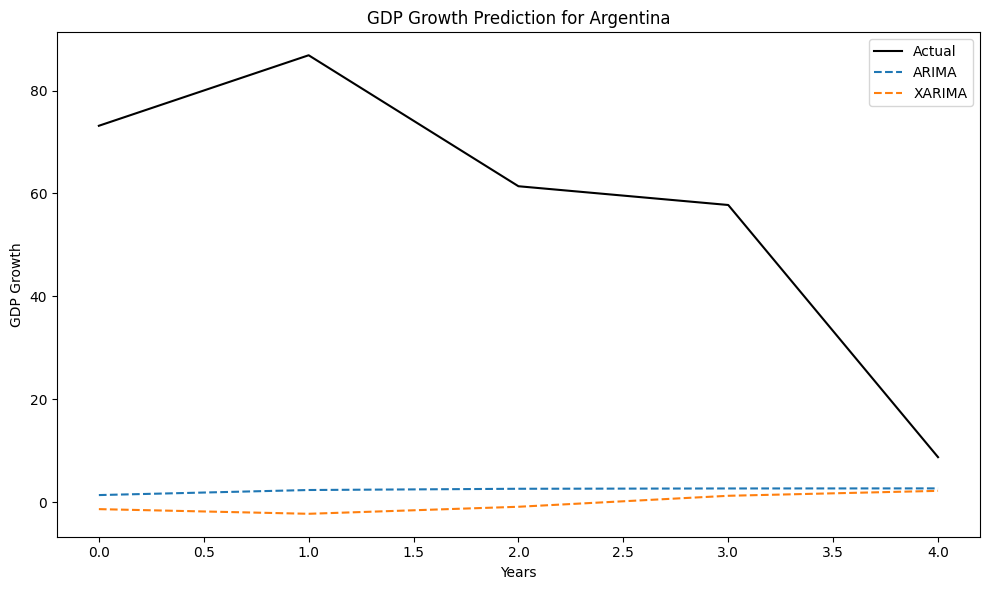

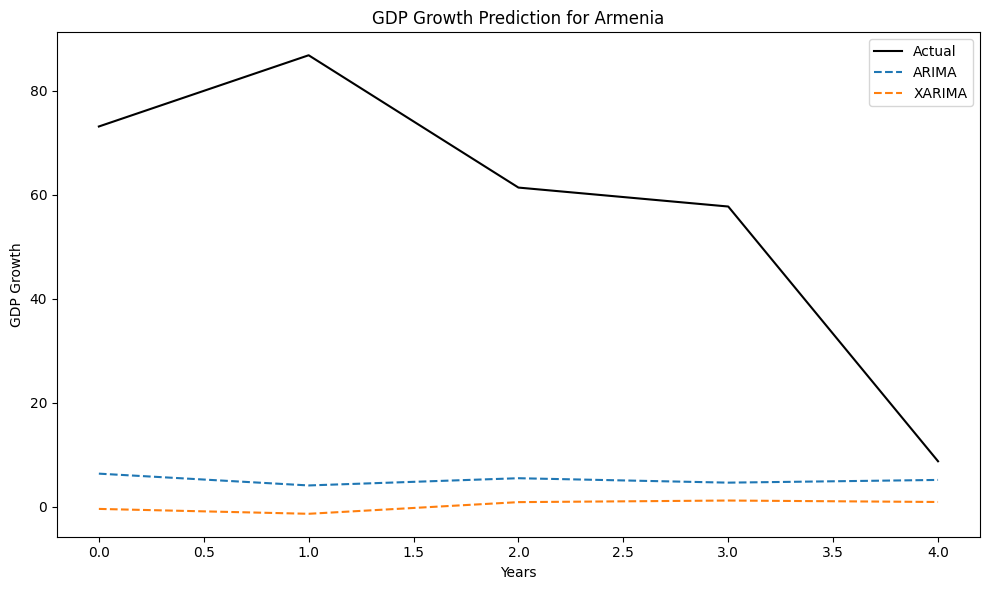

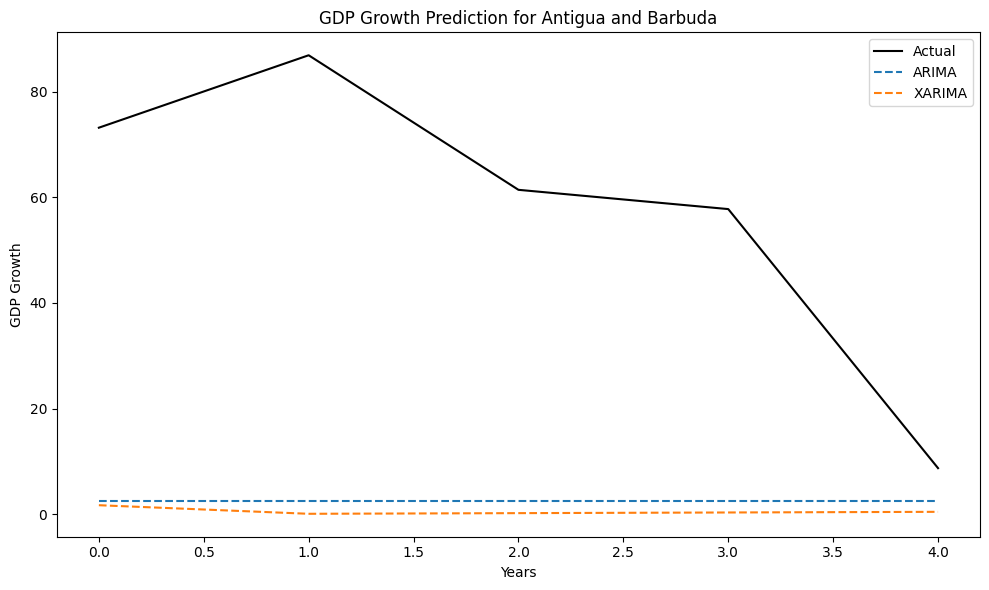

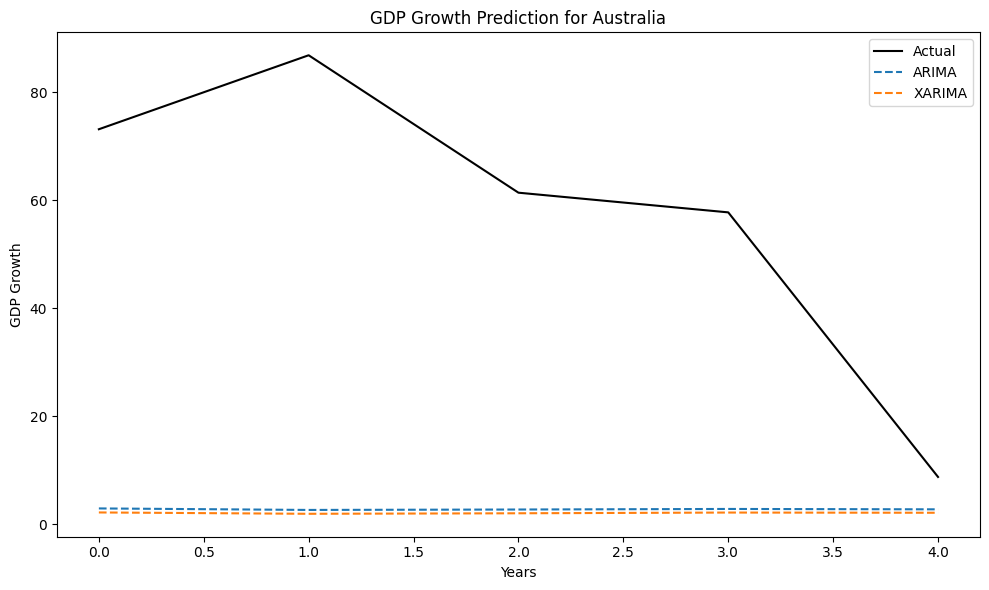

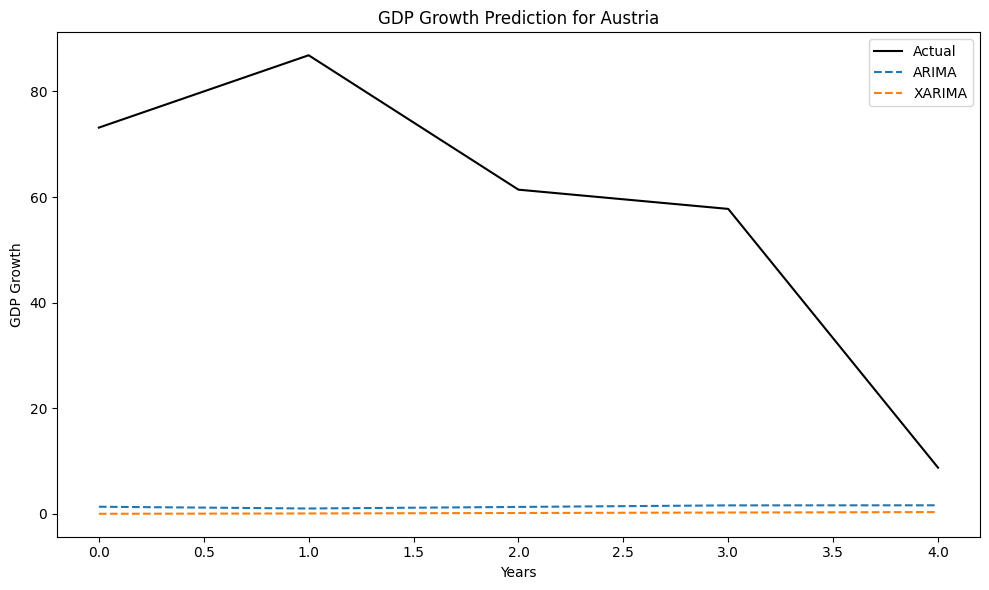

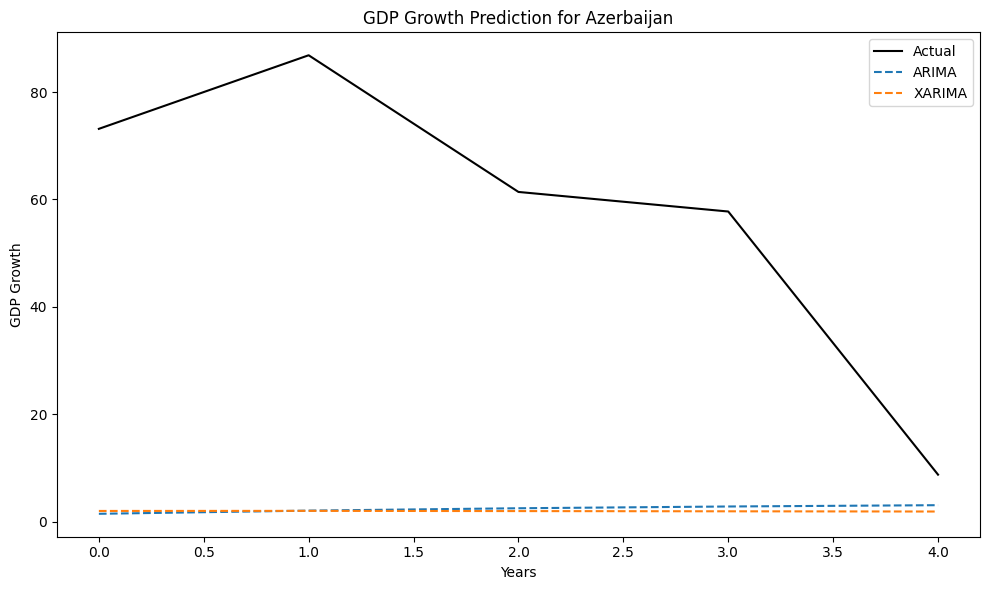

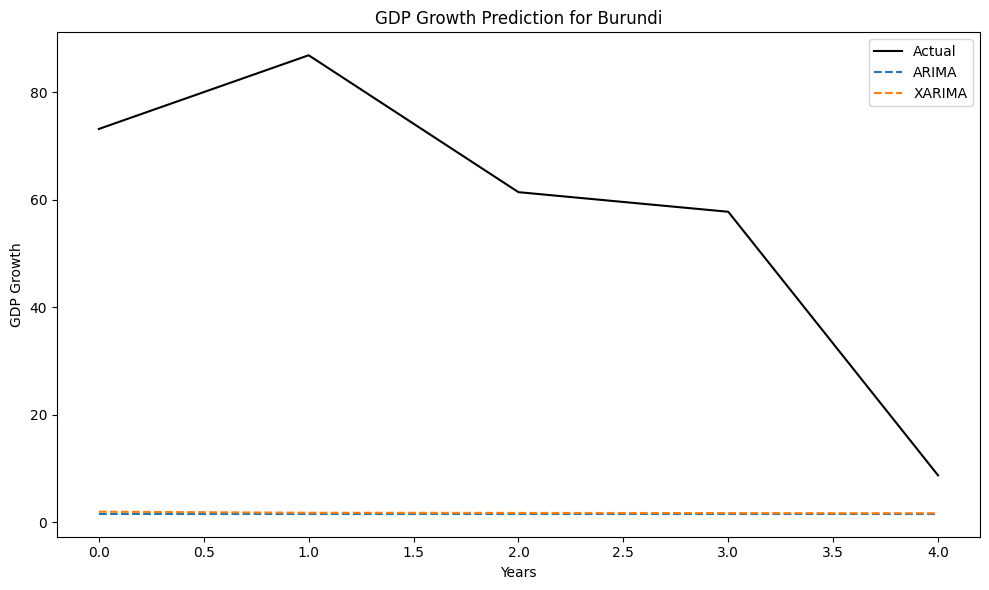

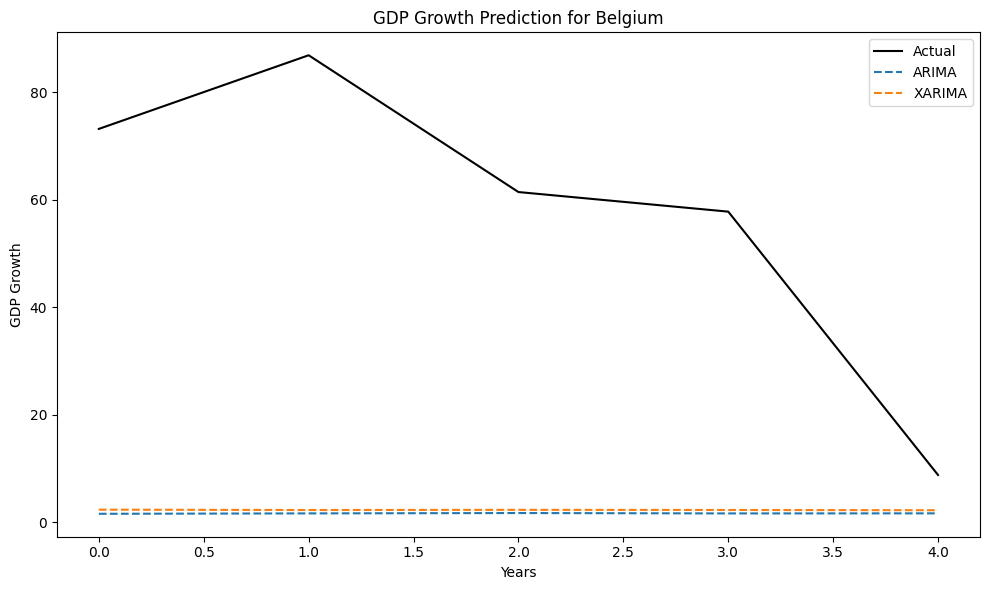

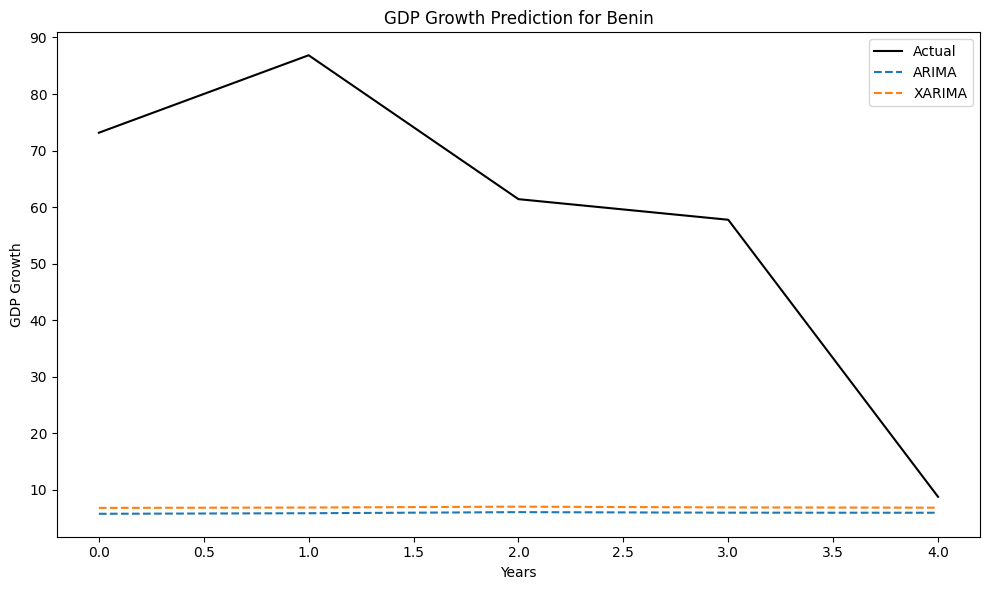

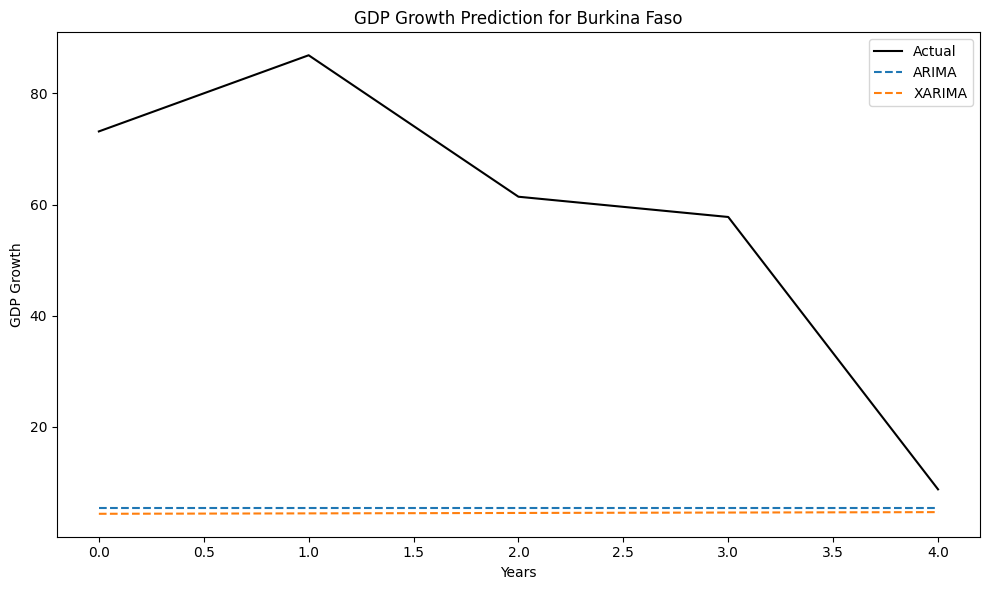

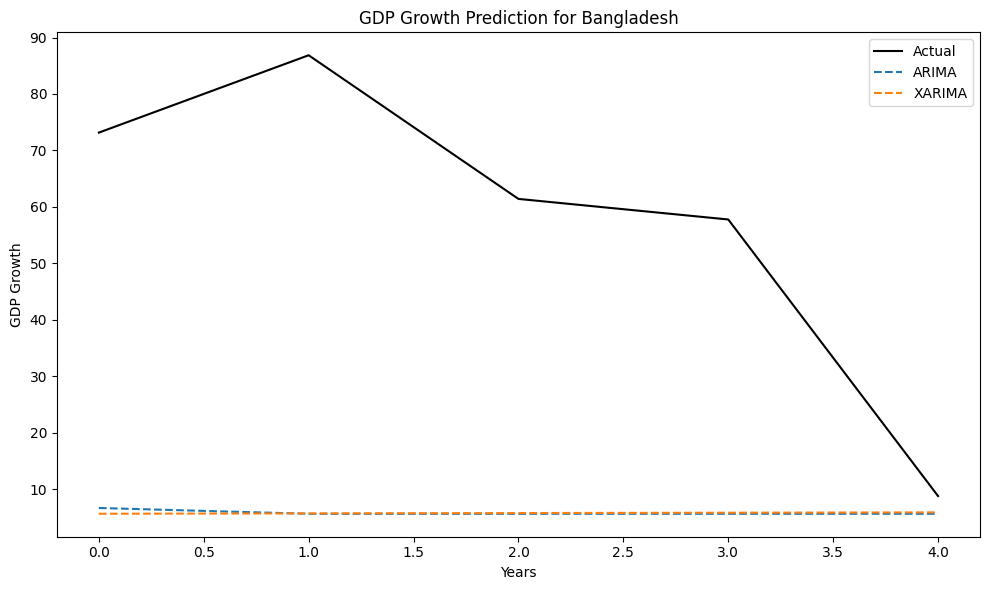

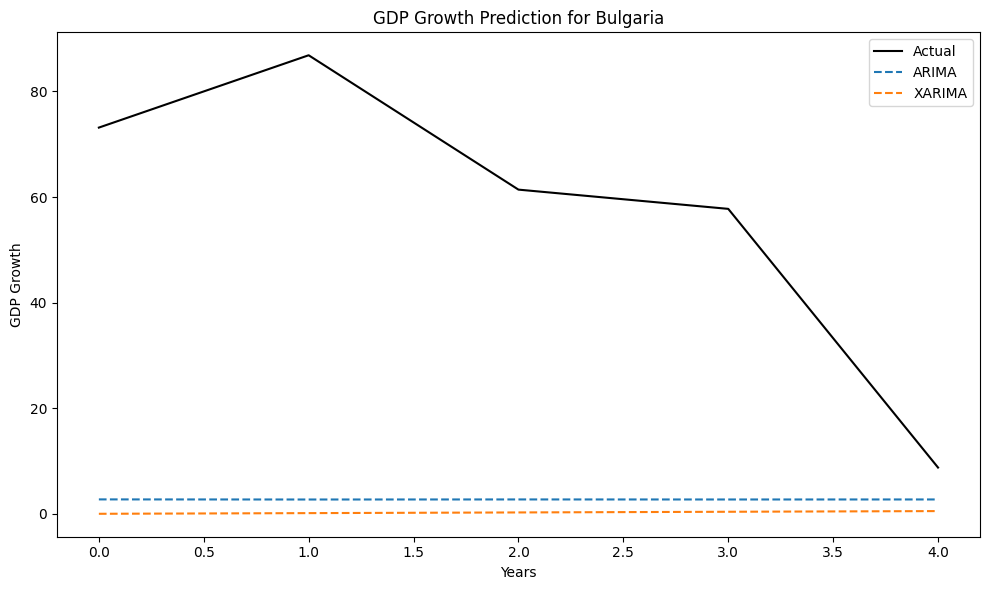

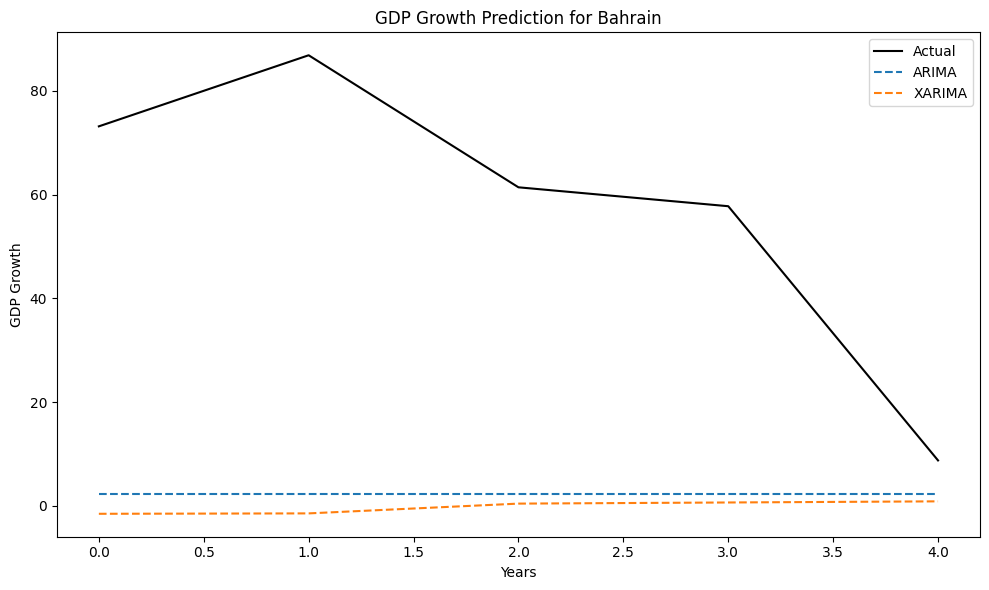

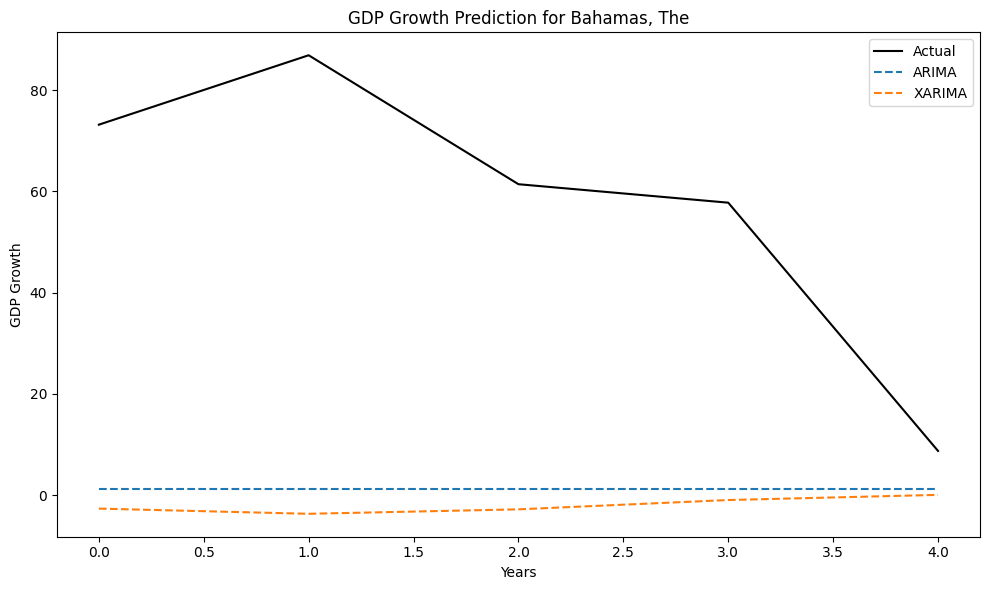

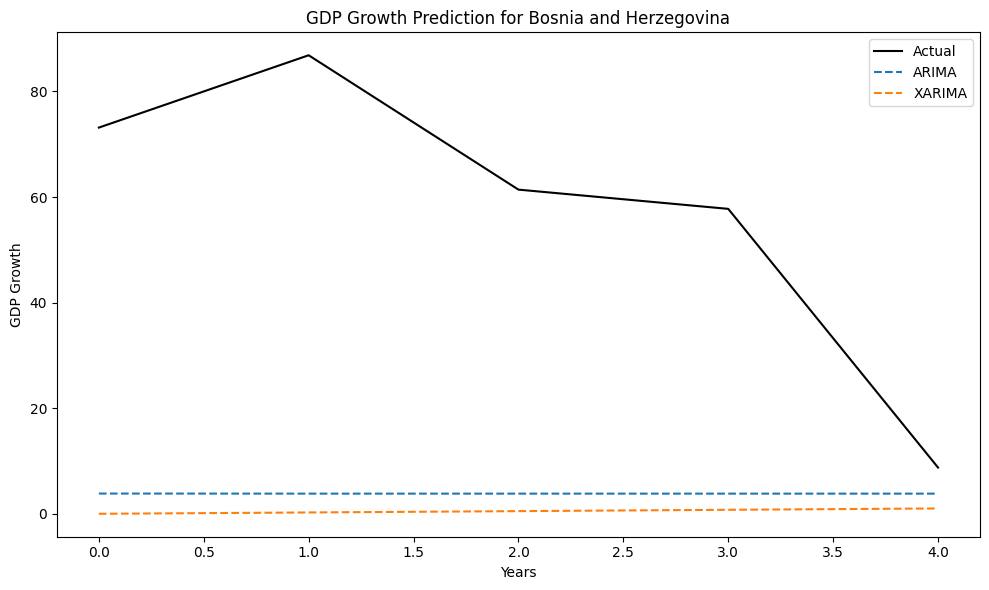

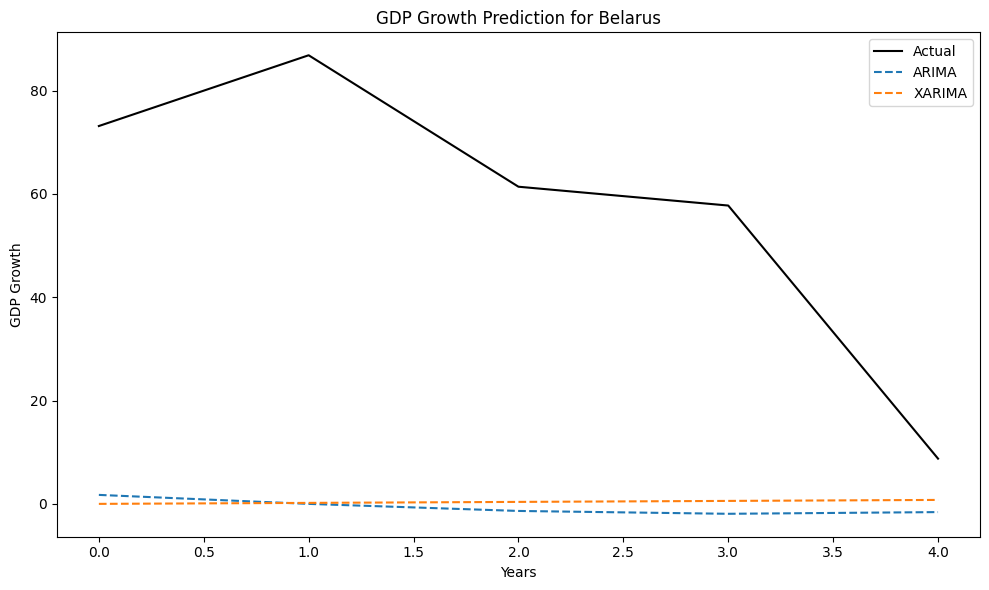

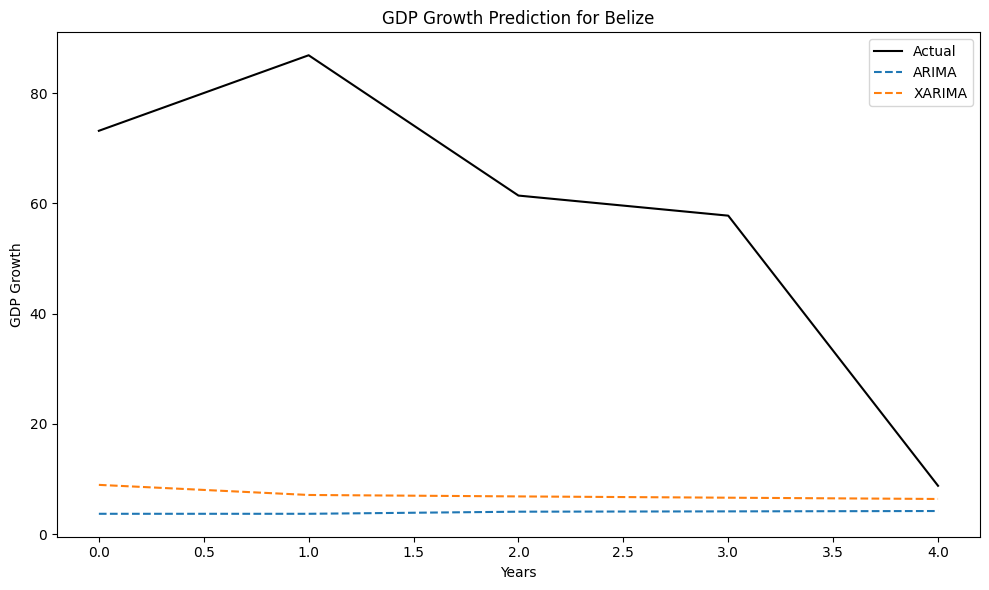

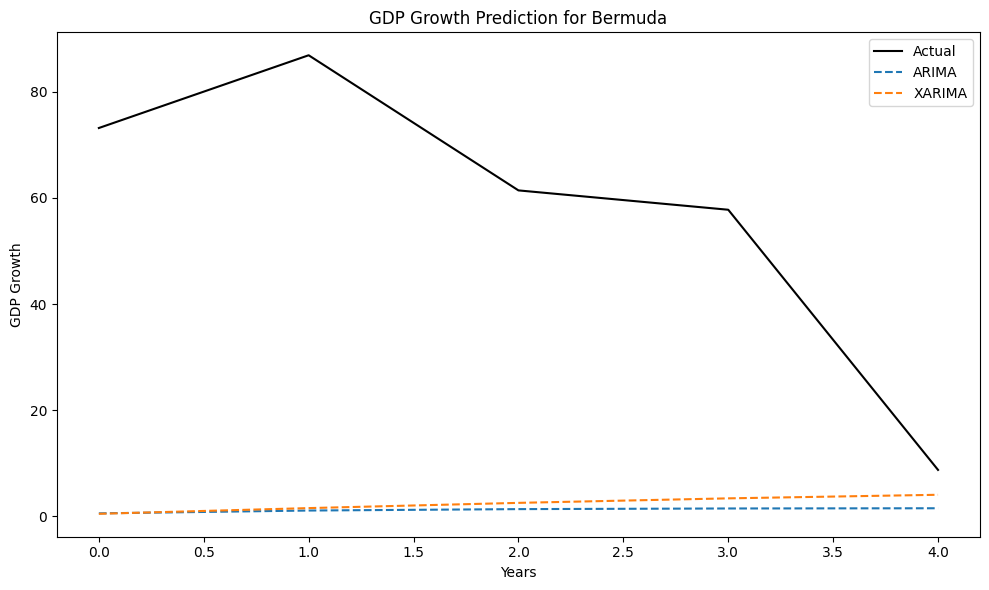

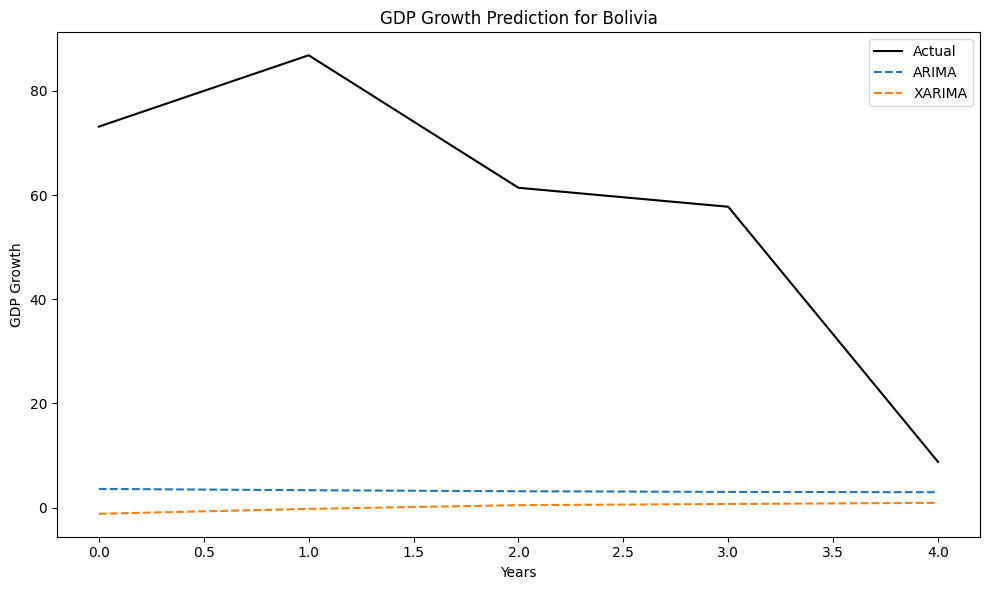

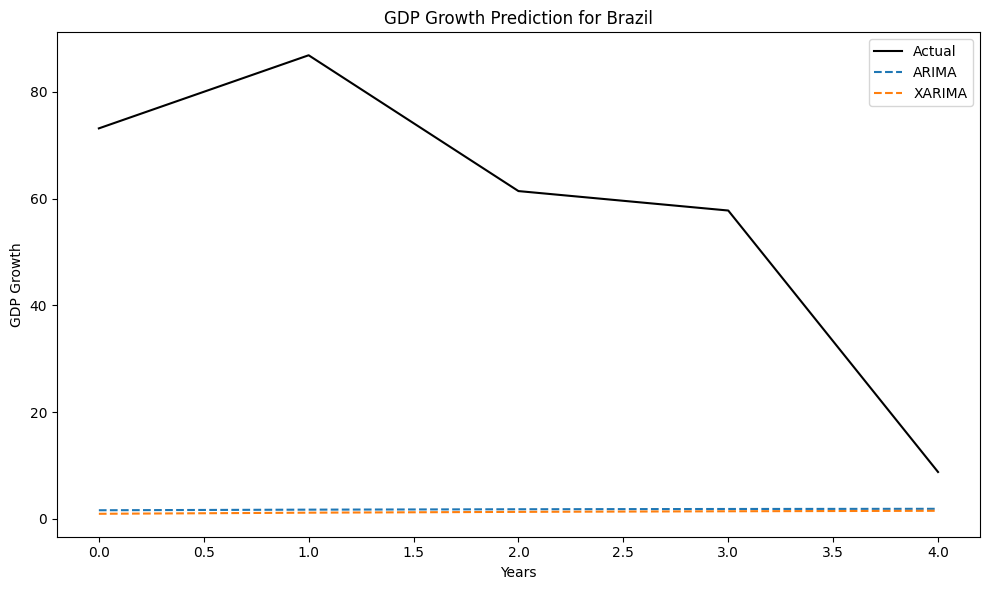

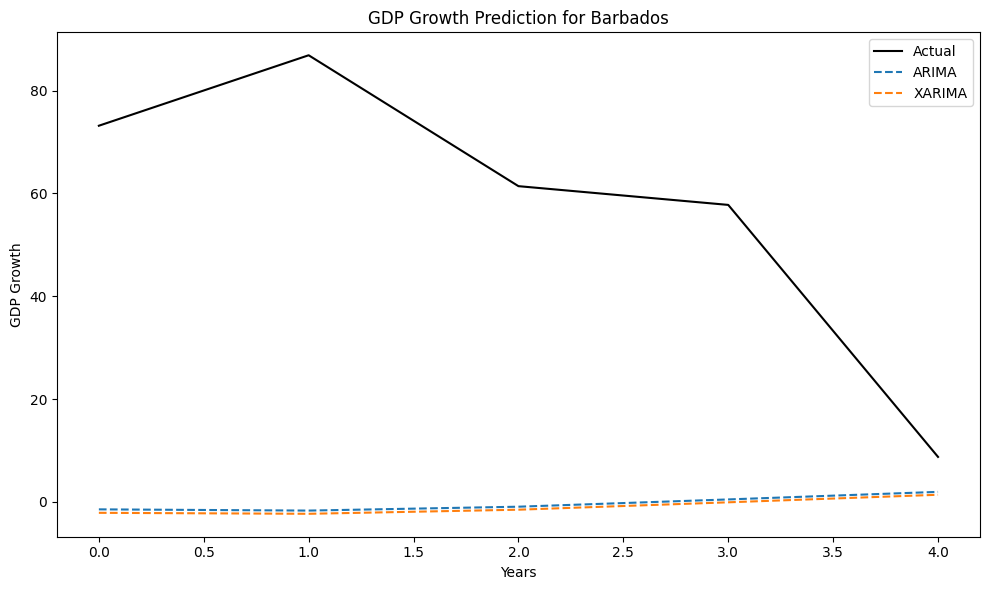

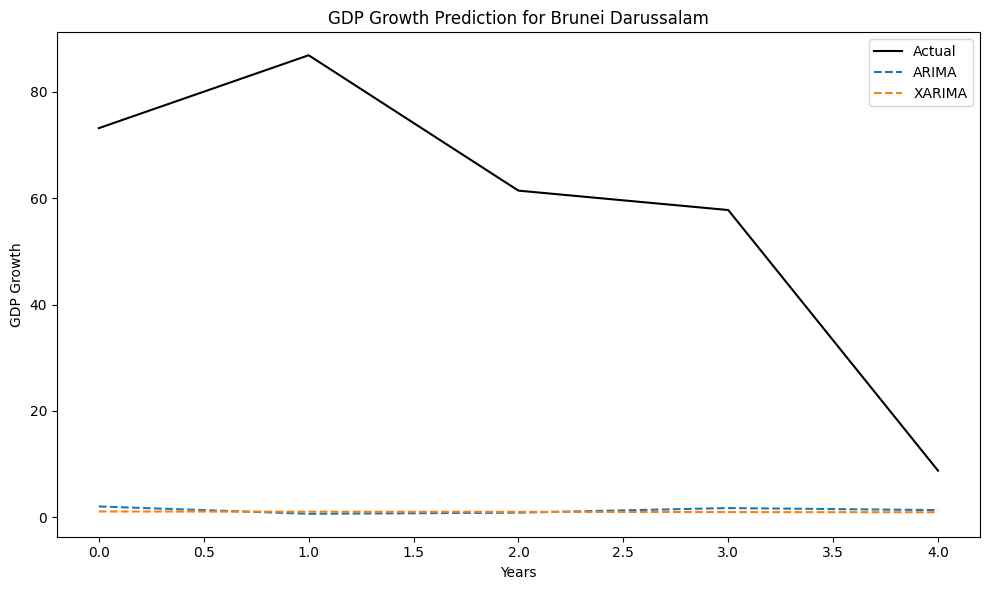

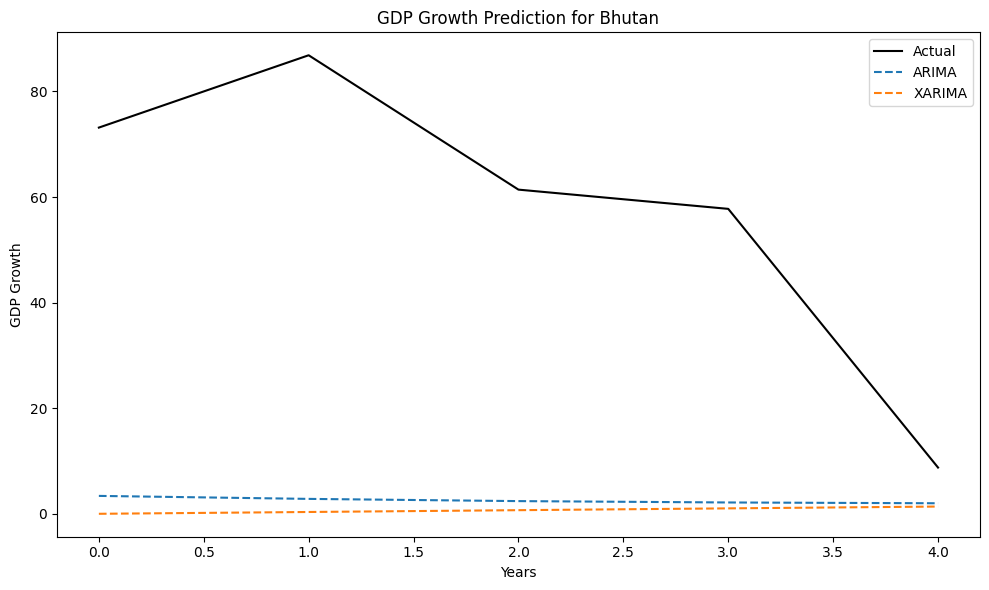

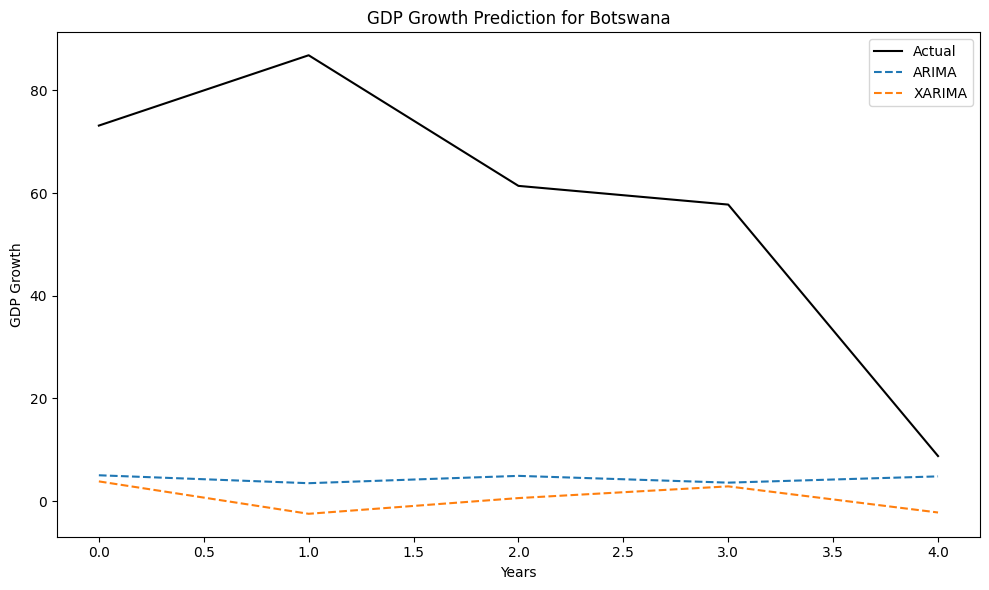

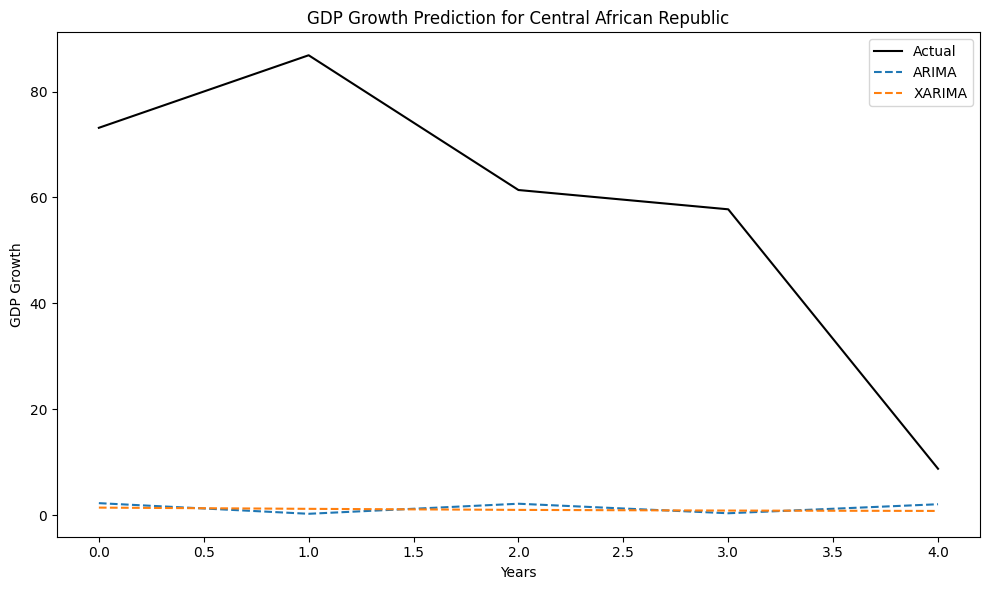

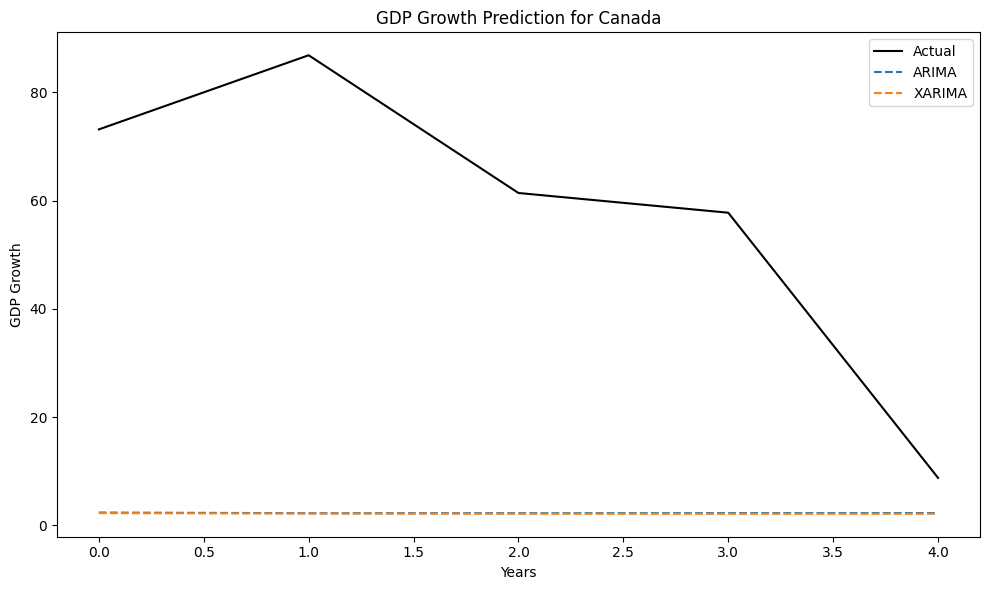

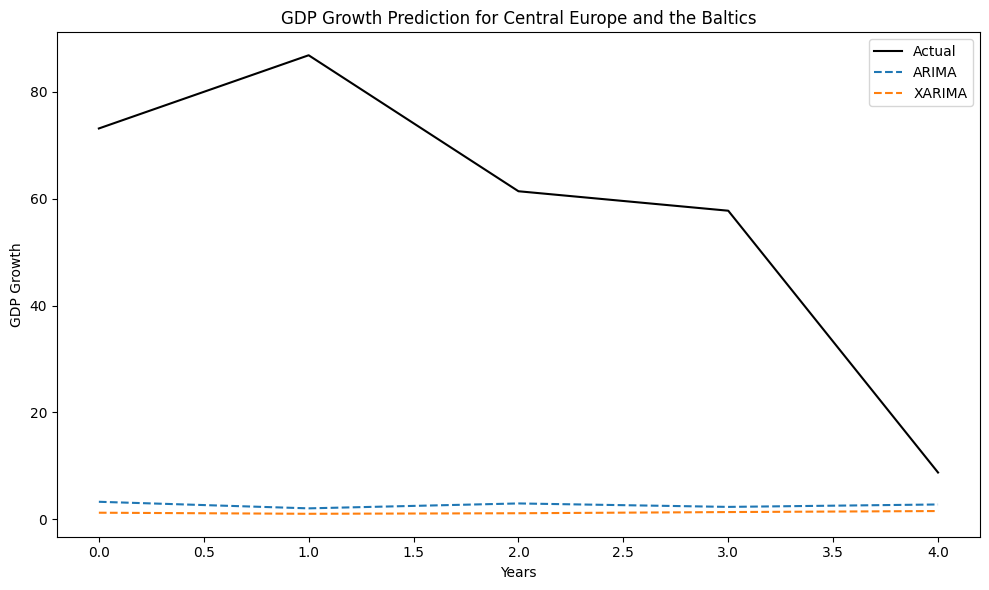

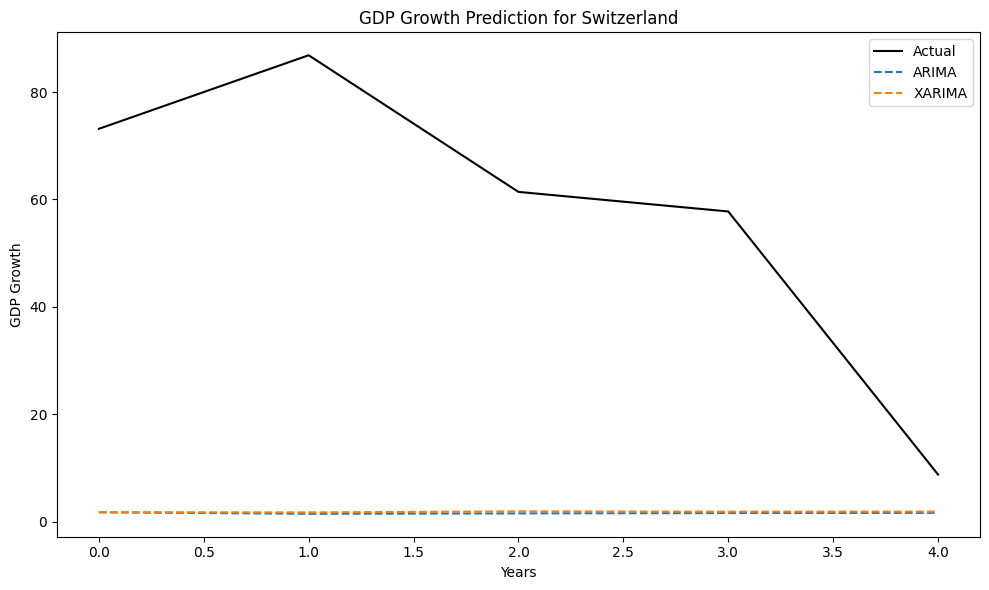

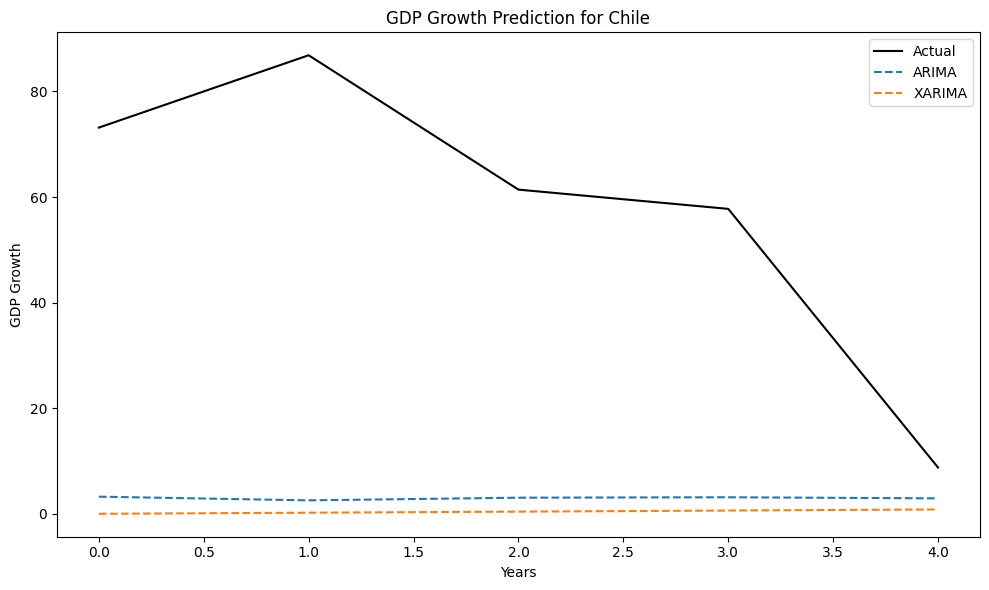

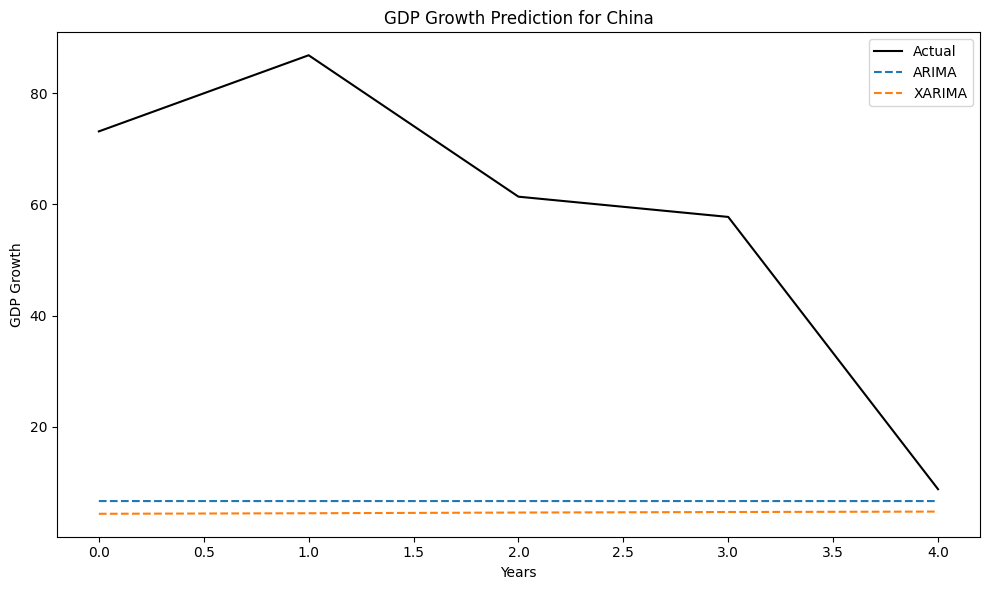

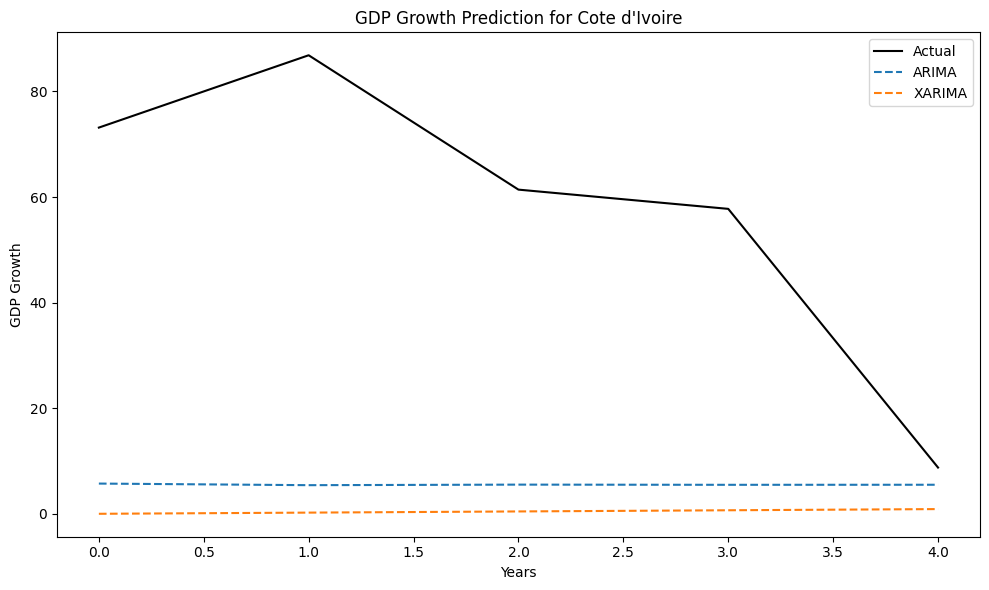

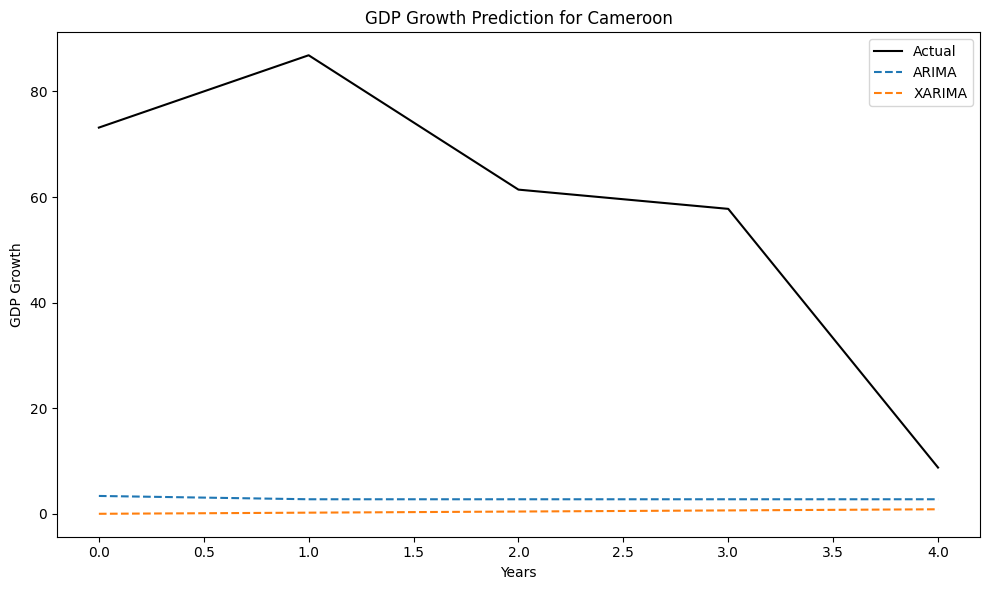

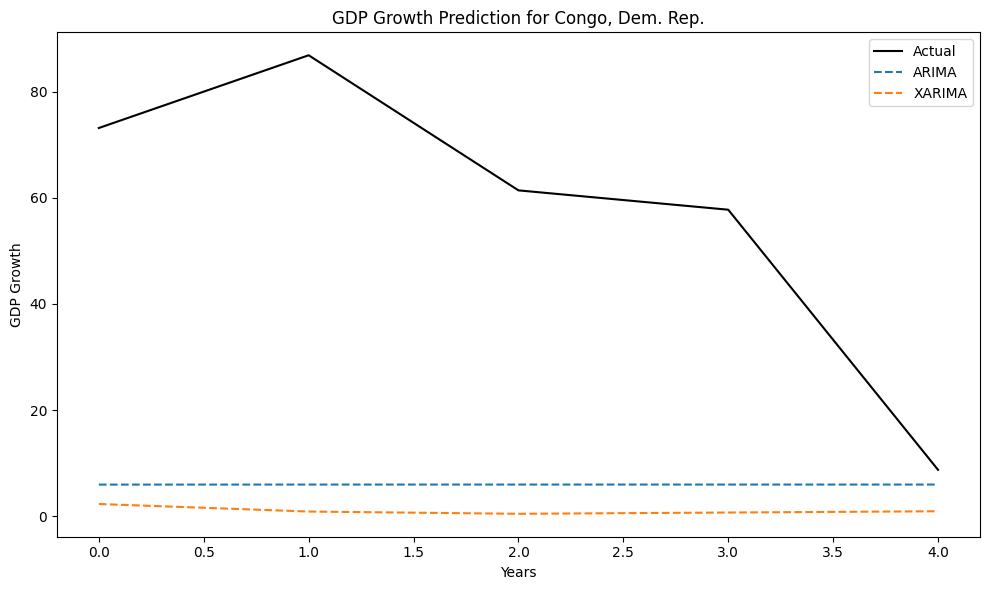

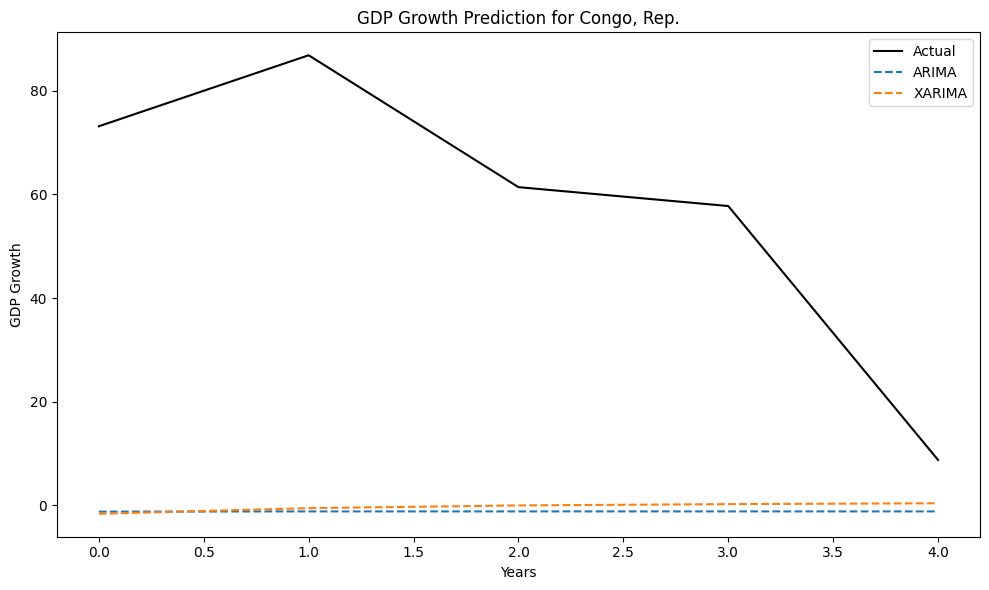

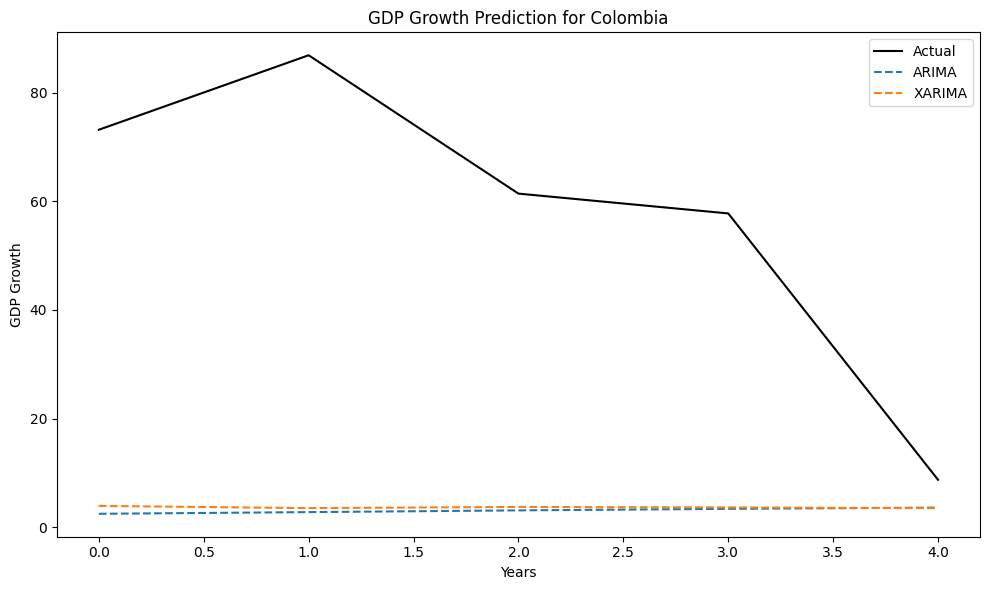

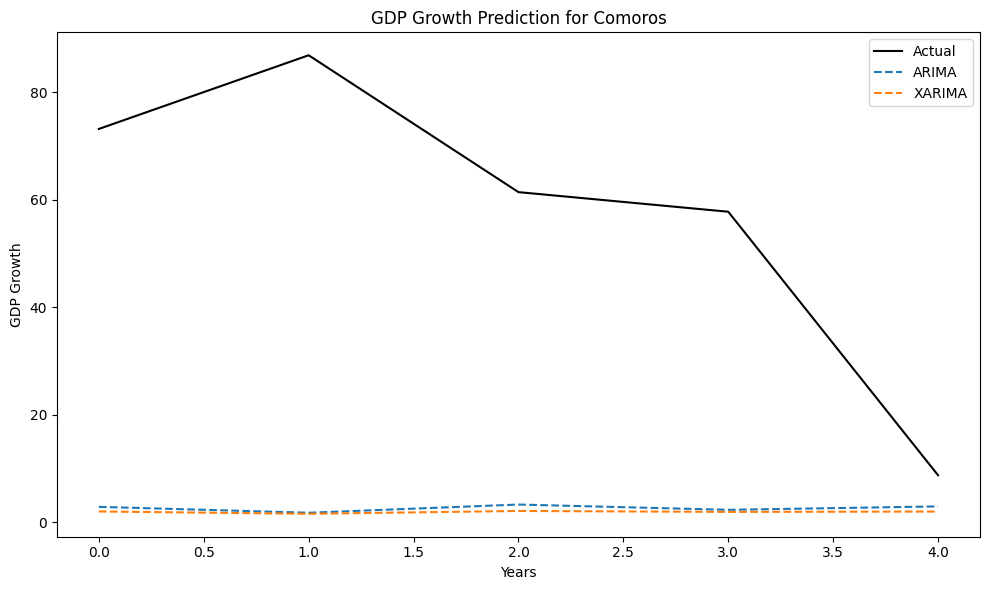

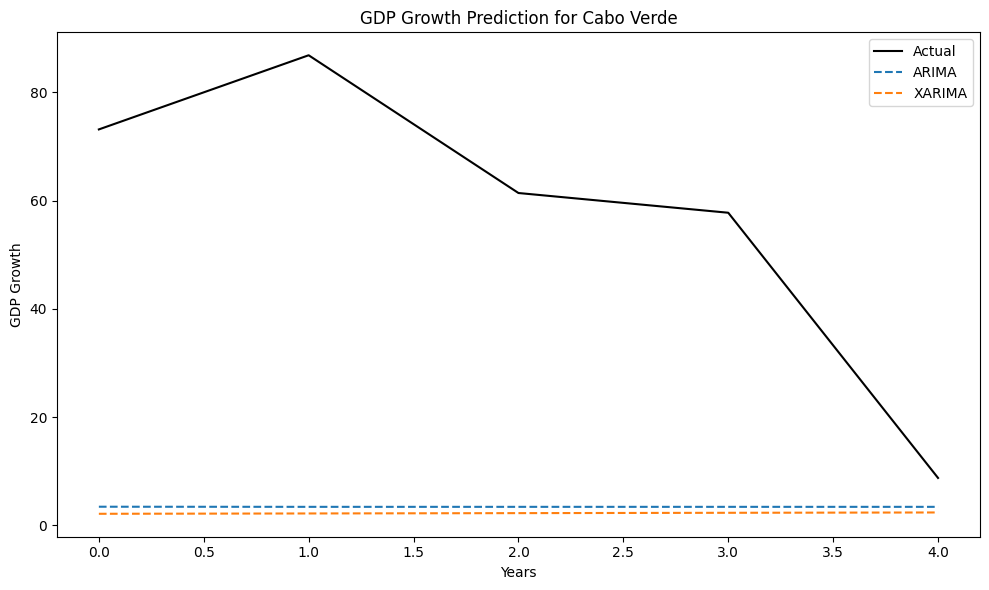

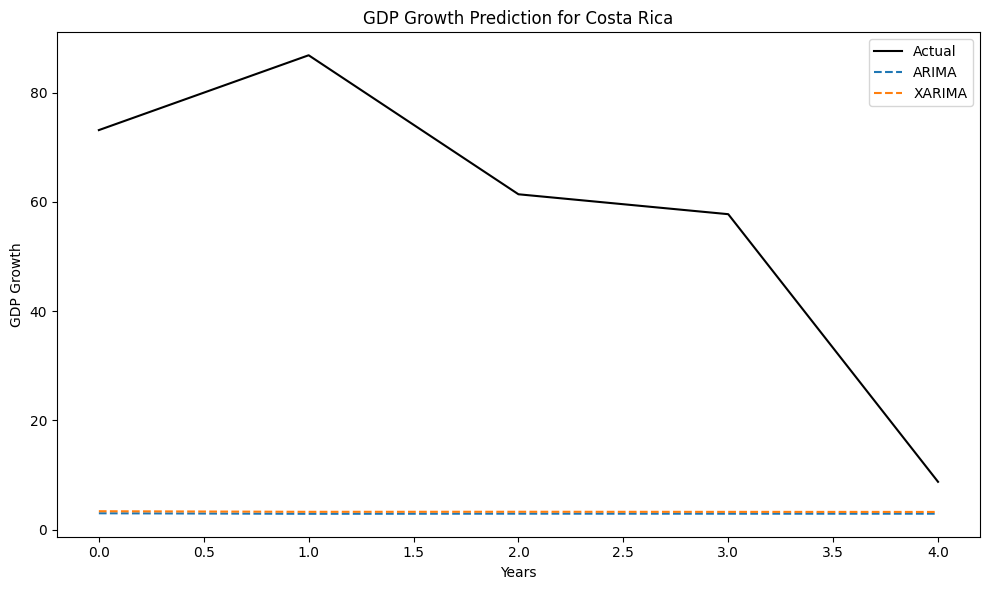

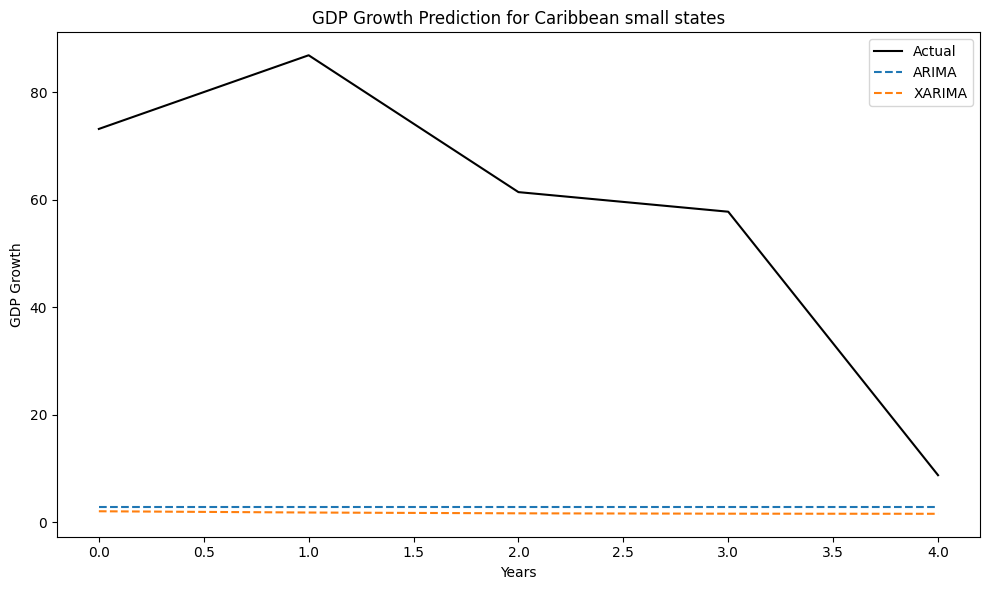

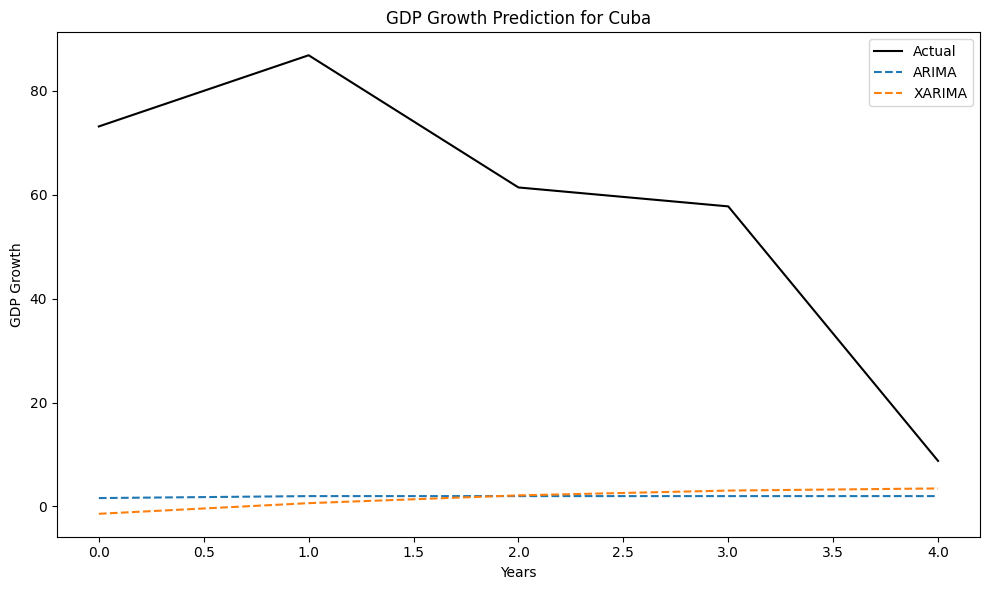

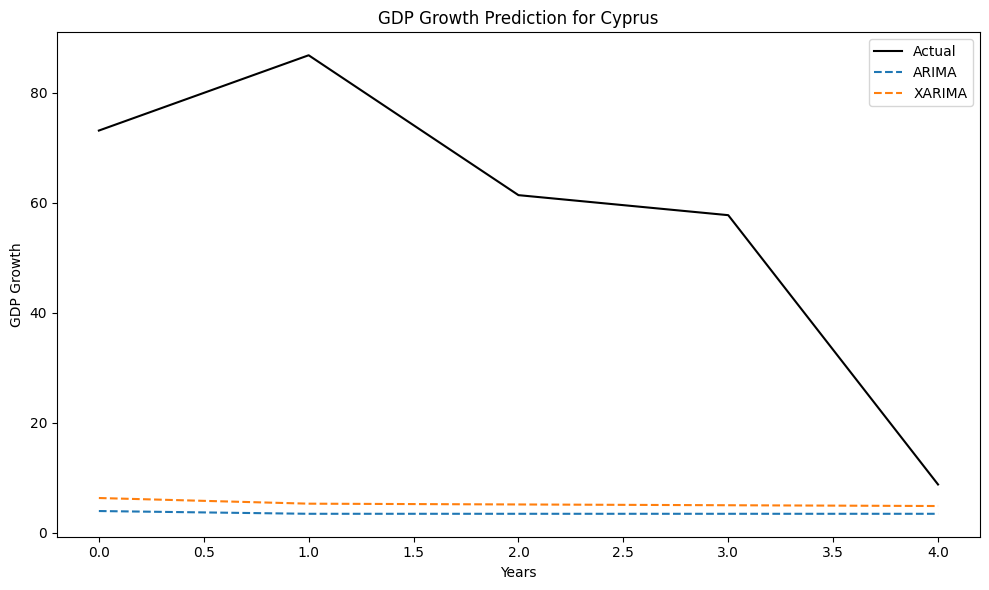

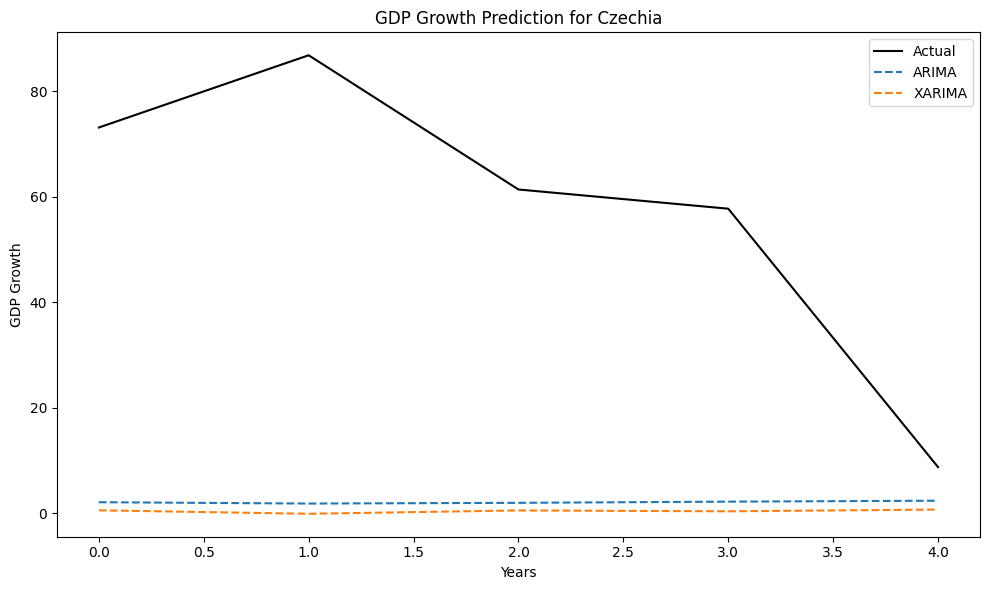

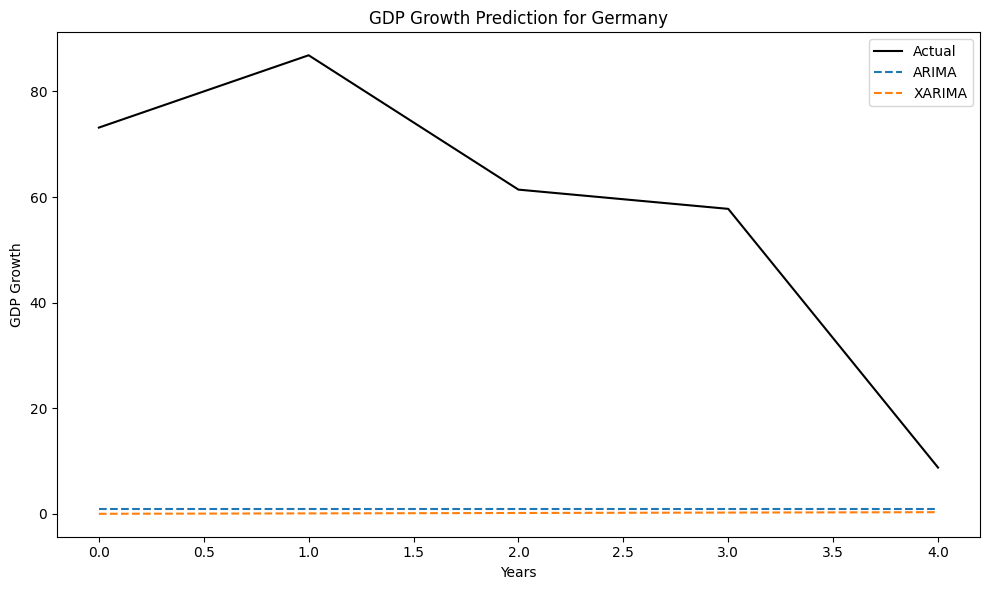

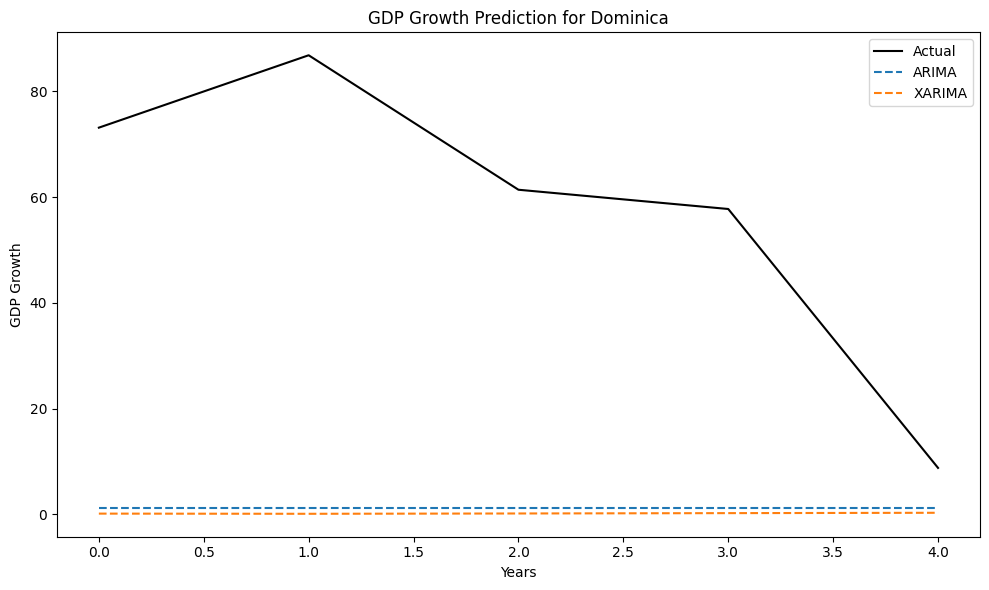

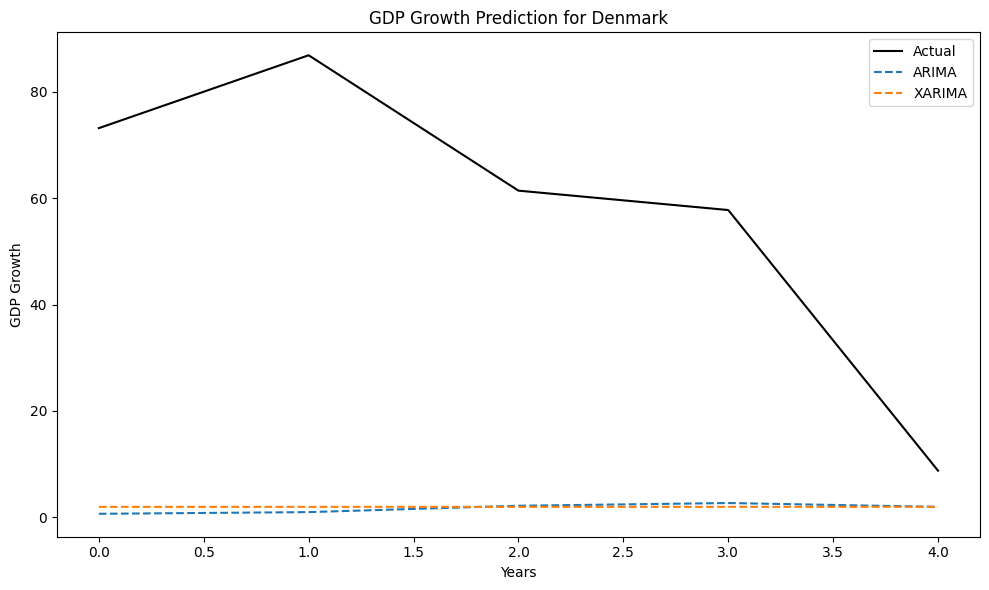

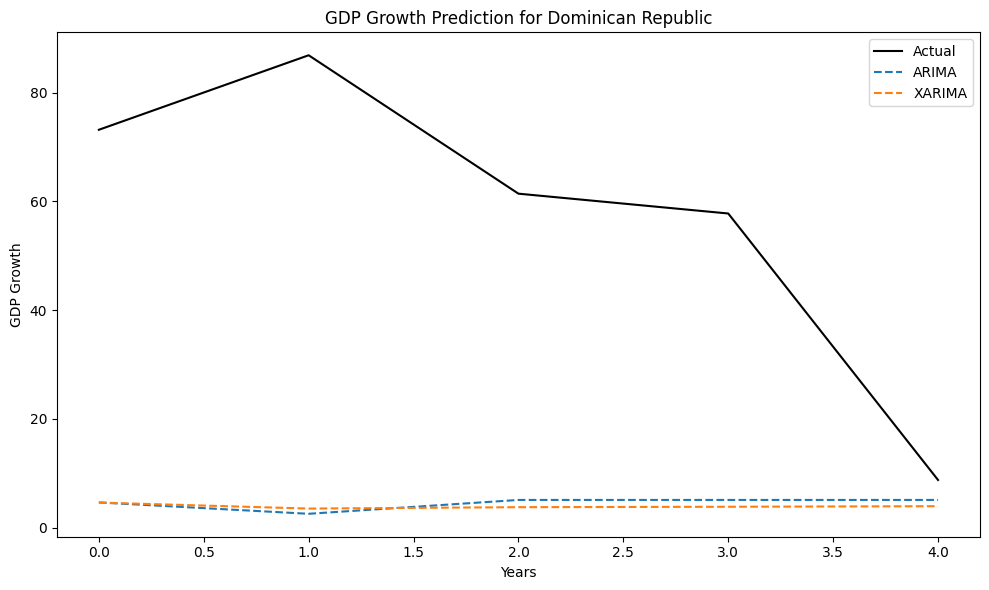

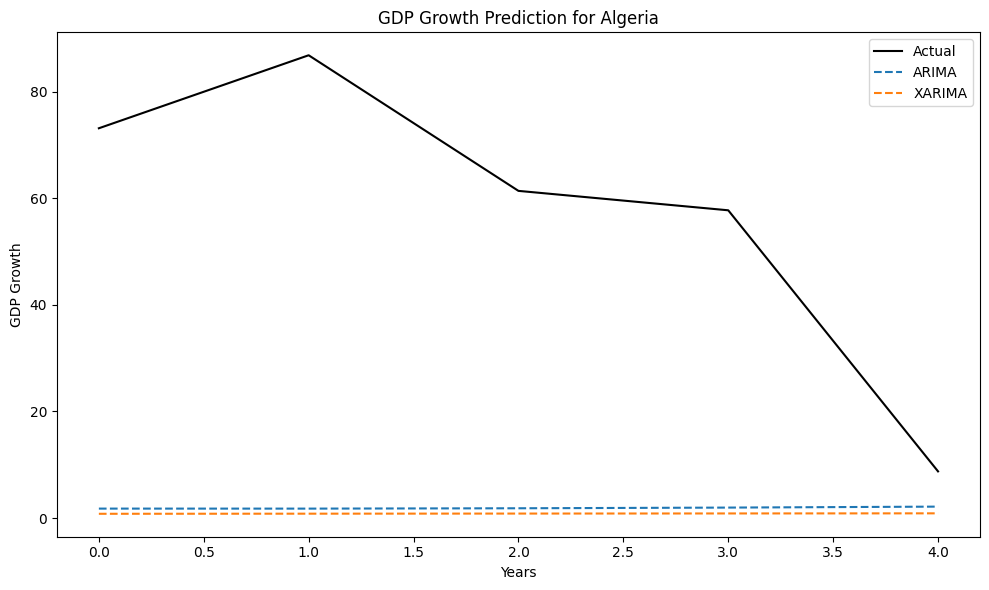

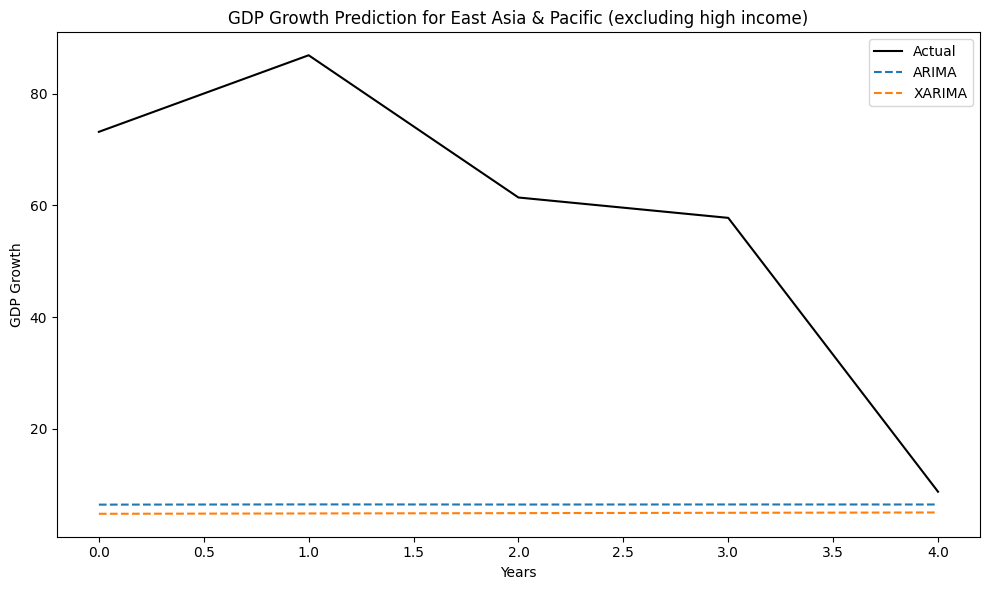

ValueError: too many values to unpack (expected 2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'
df = pd.read_csv(data_path)

# Reshape the dataset from wide to long format
df = df.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')
df['Year'] = df['Year'].astype(int)

# Function to evaluate models
def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    return mse, rmse, mae

# Extract each factor for modeling
factors = df['Indicator'].unique()

# Predictions and metrics storage
results = []
all_predictions = {}

# Split into train and test (last 5 years for testing)
def split_data(series, test_years=5):
    train_size = len(series) - test_years
    train, test = series[:train_size], series[train_size:]
    return train, test

# =============================
# LSTM Model
# =============================
def lstm_model(train, test, seq_length=5, epochs=50):
    # Prepare data for LSTM
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i + seq_length])
            y.append(data[i + seq_length])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train.values, seq_length)
    X_test, y_test = create_sequences(test.values, seq_length)

    # Skip if the test dataset is too small
    if X_test.shape[0] == 0:
        return None, (np.nan, np.nan, np.nan)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1)),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    # Predict
    predictions = model.predict(X_test).flatten()

    return predictions, evaluate_model(y_test, predictions)

# =============================
# ARIMA Model
# =============================
def arima_model(train, test):
    best_cfg = None
    best_score = float("inf")

    # Grid search for best p, d, q
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    predictions = model_fit.forecast(steps=len(test))
                    mse = mean_squared_error(test, predictions)
                    if mse < best_score:
                        best_score, best_cfg = mse, (p, d, q)
                except:
                    continue

    # Fit the best ARIMA model
    model = ARIMA(train, order=best_cfg)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))

    return predictions, evaluate_model(test, predictions)

# =============================
# XARIMA Model
# =============================
def xarima_model(train, test, exog_train, exog_test):
    best_cfg = None
    best_score = float("inf")

    # Grid search for best p, d, q
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = SARIMAX(train, order=(p, d, q), exog=exog_train)
                    model_fit = model.fit(disp=False)
                    predictions = model_fit.forecast(steps=len(test), exog=exog_test)
                    mse = mean_squared_error(test, predictions)
                    if mse < best_score:
                        best_score, best_cfg = mse, (p, d, q)
                except:
                    continue

    # Fit the best XARIMA model
    model = SARIMAX(train, order=best_cfg, exog=exog_train)
    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test), exog=exog_test)

    return predictions, evaluate_model(test, predictions)

# =============================
# Running Models for Each Factor
# =============================
for factor in factors:
    for country in df['Country Name'].unique():
        data = df[(df['Country Name'] == country) & (df['Indicator'] == factor)].dropna()
        series = data.set_index('Year')['Value']

        if len(series) < 10:
            continue

        train, test = split_data(series)

        # LSTM
        lstm_preds, lstm_metrics = lstm_model(train, test)

        if lstm_preds is not None:
            results.append({
                'Country': country,
                'Indicator': factor,
                'Model': 'LSTM',
                'MSE': lstm_metrics[0],
                'RMSE': lstm_metrics[1],
                'MAE': lstm_metrics[2]
            })

        # ARIMA
        arima_preds, arima_metrics = arima_model(train, test)

        results.append({
            'Country': country,
            'Indicator': factor,
            'Model': 'ARIMA',
            'MSE': arima_metrics[0],
            'RMSE': arima_metrics[1],
            'MAE': arima_metrics[2]
        })

        # XARIMA (example: using last 5 years as exogenous input)
        exog_train = np.arange(len(train)).reshape(-1, 1)
        exog_test = np.arange(len(test)).reshape(-1, 1)
        xarima_preds, xarima_metrics = xarima_model(train, test, exog_train, exog_test)

        results.append({
            'Country': country,
            'Indicator': factor,
            'Model': 'XARIMA',
            'MSE': xarima_metrics[0],
            'RMSE': xarima_metrics[1],
            'MAE': xarima_metrics[2]
        })

        all_predictions[f"{country}-{factor}"] = {
            'LSTM': lstm_preds,
            'ARIMA': arima_preds,
            'XARIMA': xarima_preds
        }

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results
results_df.to_csv("/content/drive/MyDrive/Msc Data Science Final Project/model_results.csv", index=False)

# =============================
# Visualization
# =============================
for key, preds in all_predictions.items():
    country, factor = key.split('-')
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(test)), test.values, label='Actual', color='black')
    if preds['LSTM'] is not None:
        plt.plot(range(len(test)), preds['LSTM'], label='LSTM', linestyle='--')
    plt.plot(range(len(test)), preds['ARIMA'], label='ARIMA', linestyle='--')
    plt.plot(range(len(test)), preds['XARIMA'], label='XARIMA', linestyle='--')
    plt.title(f"{factor} Prediction for {country}")
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel(factor)
    plt.tight_layout()
    plt.show()

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

def predict_and_evaluate_xarima(
    df,
    indicator,
    exog_vars,
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    do_stationarity_check=True,
    plot_results=True
):
    """
    Predicts and evaluates time series data for a specific indicator using a SARIMAX (XARIMA) approach.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing time series data in a wide format where columns from index 2 to -1
        represent annual values for each country & indicator.
    indicator : str
        The target indicator for which predictions are to be made.
    exog_vars : list of str
        List of indicators to be used as exogenous variables.
    order : tuple (p, d, q)
        The (p, d, q) order of the model for the number of AR parameters, differences, and MA parameters.
    seasonal_order : tuple (P, D, Q, s)
        The (P, D, Q, s) order of the seasonal component of the model.
    do_stationarity_check : bool
        Whether to perform a stationarity check (Augmented Dickey-Fuller) on the target series.
    plot_results : bool
        Whether to generate and display the train/test/forecast plots.

    Returns
    -------
    results_dict : dict
        A dictionary keyed by country, where each value is another dict containing:
        - "metrics" : dict of evaluation metrics (MSE, RMSE, MAE)
        - "future_forecast": np.ndarray of future predictions (next 5 years)
        - "future_years": list of the future years corresponding to the forecast
    """

    # (Optional) Simple SARIMA Hyperparameter Grid Search Example ------------
    # Uncomment and adjust the param lists below if you'd like to do a quick grid search.
    #
    # import itertools
    # p = d = q = range(0, 2)  # small range for demonstration
    # seasonal_p = seasonal_d = seasonal_q = range(0, 2)
    # s = [0, 4, 12]  # seasonal periods (e.g., monthly or quarterly). 0 means non-seasonal
    #
    # param_combinations = list(itertools.product(p, d, q))
    # seasonal_combinations = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, s))
    #
    # Best model will be chosen based on AIC or another criterion.
    # But for now, we’ll stick to the user-provided order.

    results_dict = {}

    for country in df['Country Name'].unique():
        country_data = df[(df['Country Name'] == country) & (df['Indicator'] == indicator)]

        # Check if country_data is empty
        if country_data.empty:
            print(f"[Warning] No data found for {country} - {indicator}. Skipping...")
            continue

        # Extract years and values
        years = country_data.columns[2:-1].astype(int).values  # numeric years
        values = country_data.iloc[:, 2:-1].values[0]

        # Extract exogenous variables
        exog_data = df[(df['Country Name'] == country) & (df['Indicator'].isin(exog_vars))]
        if exog_data.empty:
            print(f"[Warning] No exogenous data found for {country}. Skipping...")
            continue

        exog_values = exog_data.iloc[:, 2:-1].values.T

        # Check if there are enough data points
        if len(values) < 10:
            print(f"[Warning] Not enough data for {country} - {indicator}. Skipping...")
            continue

        # --- (Optional) Stationarity Check -----------------------------------
        if do_stationarity_check:
            adf_result = adfuller(values, autolag='AIC')
            p_value = adf_result[1]
            if p_value > 0.05:
                print(f"[Info] {country} - {indicator} time series might be non-stationary (p-value={p_value:.4f}). "
                      f"Consider differencing or using d>0 in the SARIMAX order.\n")

        # Scale target values
        target_scaler = MinMaxScaler()
        values_scaled = target_scaler.fit_transform(values.reshape(-1, 1))

        # Scale exogenous variables
        exog_scaler = MinMaxScaler()
        exog_scaled = exog_scaler.fit_transform(exog_values)

        # Split data into training and testing sets
        split_point = int(len(values_scaled) * 0.8)
        train, test = values_scaled[:split_point], values_scaled[split_point:]
        train_exog, test_exog = exog_scaled[:split_point], exog_scaled[split_point:]
        test_years = years[split_point:]

        # Create and fit the model
        model = SARIMAX(
            train,
            exog=train_exog,
            order=order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        result = model.fit(disp=False)

        # Forecast the test set
        forecast = result.predict(
            start=split_point,
            end=len(values_scaled) - 1,
            exog=test_exog
        )
        forecast_rescaled = target_scaler.inverse_transform(forecast.reshape(-1, 1))
        test_rescaled = target_scaler.inverse_transform(test)

        # Evaluate the model
        mse = mean_squared_error(test_rescaled, forecast_rescaled)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_rescaled, forecast_rescaled)

        # Forecast the next 5 years
        future_exog = np.tile(test_exog[-1], (5, 1))  # Use the last exogenous values for future predictions
        future_forecast = result.forecast(steps=5, exog=future_exog)
        future_forecast_rescaled = target_scaler.inverse_transform(future_forecast.reshape(-1, 1))
        future_years = list(range(years[-1] + 1, years[-1] + 6))

        # Store results
        results_dict[country] = {
            "metrics": {
                "MSE": mse,
                "RMSE": rmse,
                "MAE": mae
            },
            "future_forecast": future_forecast_rescaled,
            "future_years": future_years
        }

        # Print results
        print(f"Results for {country} - {indicator}:")
        print(f"  Mean Squared Error : {mse:.4f}")
        print(f"  Root Mean Squared Error : {rmse:.4f}")
        print(f"  Mean Absolute Error : {mae:.4f}")

        print("\nPredictions for the next 5 years:")
        for year, pred in zip(future_years, future_forecast_rescaled):
            print(f"  Year {year}: {pred[0]:.4f}")
        print("-" * 50)

        # Visualization
        if plot_results:
            plt.figure(figsize=(10, 6))
            plt.plot(years[:split_point], target_scaler.inverse_transform(train),
                     label="Train Data", marker="o")
            plt.plot(test_years, test_rescaled, label="Test Data", marker="o")
            plt.plot(test_years, forecast_rescaled, label="Predictions", linestyle="--")
            plt.plot(future_years, future_forecast_rescaled, label="Future Predictions",
                     linestyle="--", marker="o")
            plt.title(f"{country} - {indicator}: XARIMA Model")
            plt.xlabel("Year")
            plt.ylabel("Value")
            plt.legend()
            plt.grid()
            plt.show()

    return results_dict


# =========================
# Example usage
# =========================
# Suppose you have a DataFrame named df_developed with the required structure,
# and a list of indicators for which you'd like to run the analysis.

#indicators = ['GDP Growth', 'Inflation', 'Unemployment']
# exog_vars = ['Real Interest rate', 'Houseolld']  # Exogenous variables

 #for ind in indicators:
  #   results = predict_and_evaluate_xarima(
   ##     indicator=ind,
     #    order=(1, 1, 1),
      #   seasonal_order=(0, 0, 0, 0),
       #  do_stationarity_check=True,
        # plot_results=True
    # ) `results` is a dictionary with all country-specific forecasts and metrics.
